In [1]:
import os
import sys
import math
import uproot
import numpy as np

import matplotlib.pyplot as plt

from scipy          import stats
from scipy.optimize import curve_fit
from collections    import namedtuple

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('/Users/romoluque_c/Repositories/BACON_romo/')
sys.path.append(repository_path)

import peak_functions as pf

In [3]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 13

## Calibration runs taken in September

In [4]:
data_path = '/Users/romoluque_c/LEGEND/BACON/datatest/SiPM_tests_sept/'

In [5]:
def load_data(channel, day, vbias, vled):
    return uproot.open(data_path + f'QE{channel}-09_{day}_2023-V_{vbias}-A_{vled}-Hz_10.root')['RawTree']

def compute_max_wf(RawTree, channel=0):
    wfs_chann   = np.array(RawTree[f'chan{channel}/rdigi'].array())
    subt_raw_wf = list(map(pf.subtract_baseline, wfs_chann))
    max_wf      = np.array([np.max(subt_raw_wf[evt][int(1550/2):int(1700/2)]) for evt in range(len(subt_raw_wf))])
    return max_wf

def load_data_and_compute_max_wf(channel, day, vbias, vled):
    data   = load_data(channel, day, vbias, vled)
    max_wf = compute_max_wf(data)
    return max_wf

In [6]:
RawTree1  = load_data(channel=1,  day='01', vbias=55, vled=7.4)
RawTree2  = load_data(channel=2,  day='01', vbias=55, vled=7.4)
RawTree65 = load_data(channel=65, day='07', vbias=55, vled=6.4)

In [7]:
channels = [   1,    2,    3,   55,   56,   57,   58,   59,   60,   64,   65,   66]
vleds0   = [   7,    7,    7,    6,    6,    6,    6,    6,    6,    6,    6,    6]
days     = ['01', '01', '01', '11', '11', '11', '11', '11', '11', '07', '07', '07']

channel_v    = namedtuple('channel', 'channel vbias vled')
all_max_data = {channel_v(channel=ch, vbias=vb, vled=vl): load_data_and_compute_max_wf(ch, day, vb, vl)
                for ch, vled0, day in zip(channels, vleds0, days)
                for vl             in [vled0 + 0.4, vled0 + 0.6]
                for vb             in [55, 56]}

### Take a look at multiple waveforms of the same SiPM

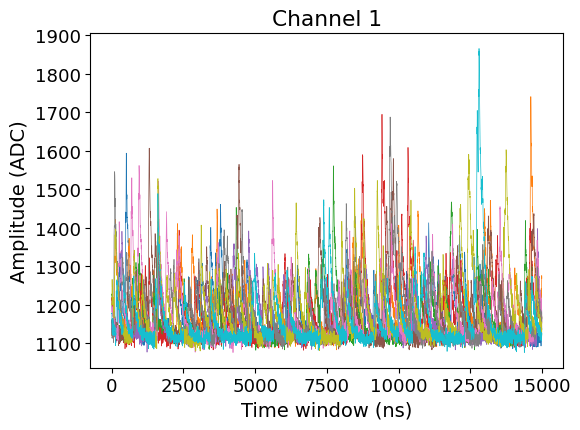

In [8]:
channel = 1
plt.figure(figsize=(6, 4.5))
for evt in range(10):
    wf2 = np.array(RawTree1[f'chan0/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf2)), wf2, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude (ADC)', fontsize=14)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

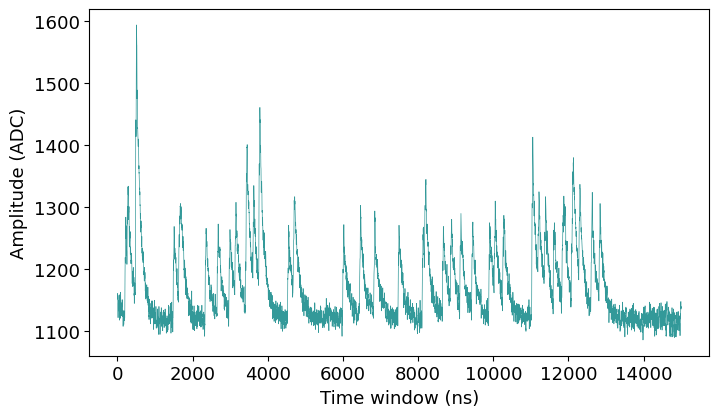

In [9]:
for evt in range(1):
    plt.figure(figsize=(8, 4.5))
    wf2 = np.array(RawTree1[f'chan0/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf2)), wf2, linewidth=0.5, color='teal', alpha=0.8)
    plt.xlabel('Time window (ns)', fontsize=13)
    plt.ylabel('Amplitude (ADC)',  fontsize=13)
    #plt.savefig('/Users/romoluque_c/LEGEND/BACON/plots/wf_dark_box.pdf', bbox_inches='tight')
    plt.show()

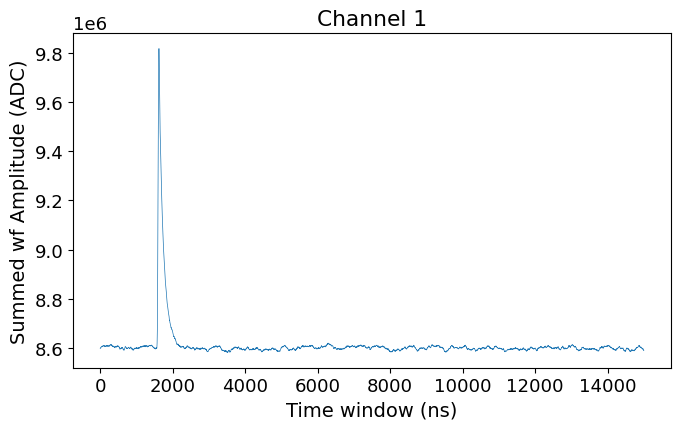

In [10]:
channel  = 1
num_evts = 100
plt.figure(figsize=(7, 4.5))
sum_wf2 = np.sum(np.array(RawTree1[f'chan0/rdigi'].array())[:], axis=0)
plt.plot(2*np.arange(len(wf2)), sum_wf2, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Summed wf Amplitude (ADC)', fontsize=14)
#plt.xlim(0,2000)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

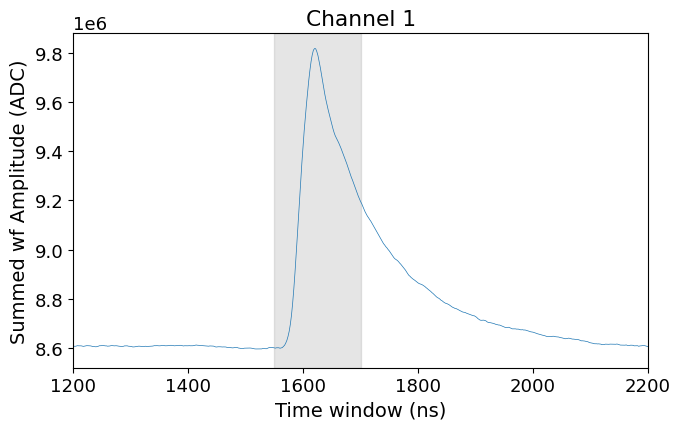

In [11]:
channel  = 1
num_evts = 100
plt.figure(figsize=(7, 4.5))
sum_wf2 = np.sum(np.array(RawTree1[f'chan0/rdigi'].array()), axis=0)
plt.plot(2*np.arange(len(wf2)), sum_wf2, linewidth=0.5)
plt.axvspan(1550, 1700, color='grey', alpha=0.2)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Summed wf Amplitude (ADC)', fontsize=14)
plt.xlim(1200,2200)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

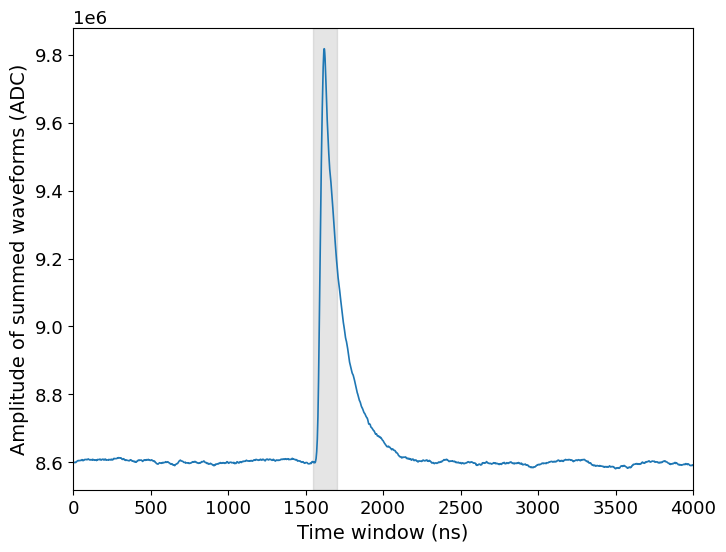

In [12]:
channel  = 1
num_evts = 100
plt.figure(figsize=(8, 6))
sum_wf2 = np.sum(np.array(RawTree1[f'chan0/rdigi'].array())[:], axis=0)
plt.plot(2*np.arange(len(wf2)), sum_wf2, linewidth=1.2)
plt.axvspan(1550, 1700, color='grey', alpha=0.2)
plt.xlabel('Time window (ns)', fontsize=14)
plt.ylabel('Amplitude of summed waveforms (ADC)', fontsize=14)
plt.xlim(0,4000)
#plt.savefig('/Users/romoluque_c/LEGEND/BACON/Analysis_documentation/images/summed_wf_trigger_region_colored.pdf', bbox_inches='tight')
plt.show()

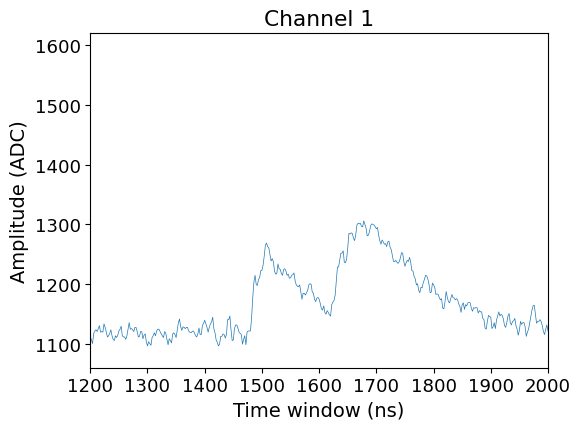

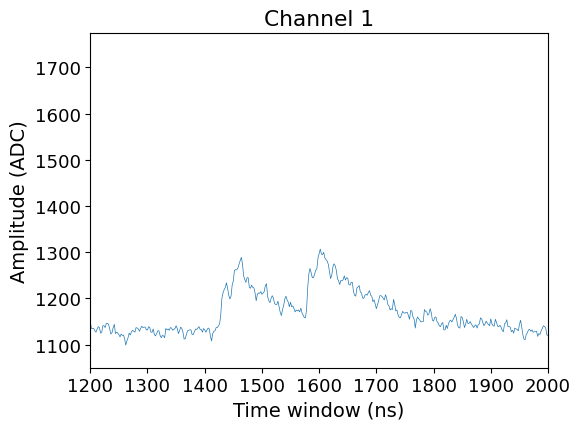

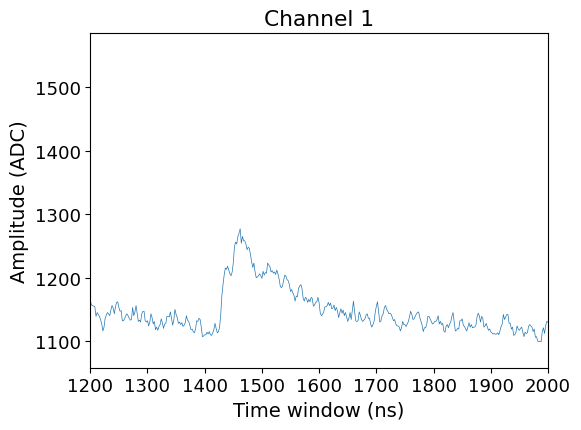

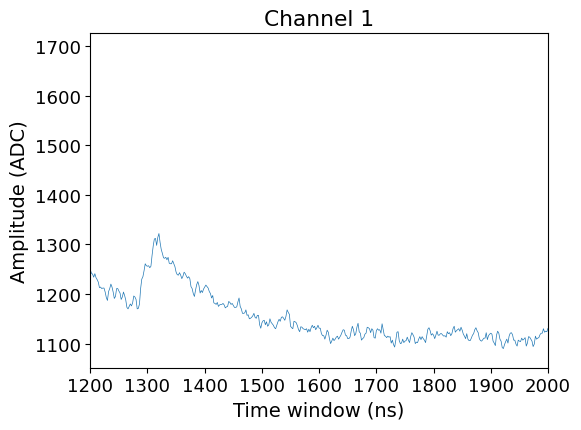

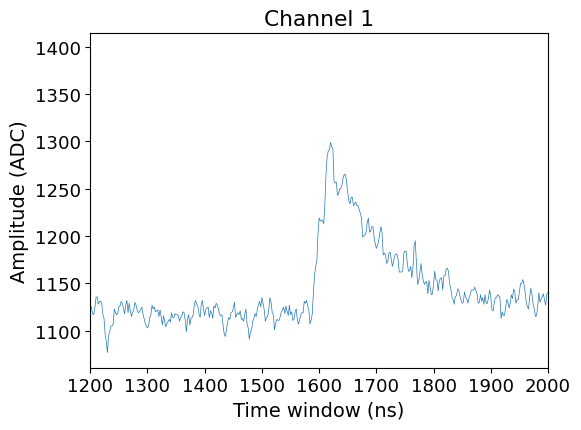

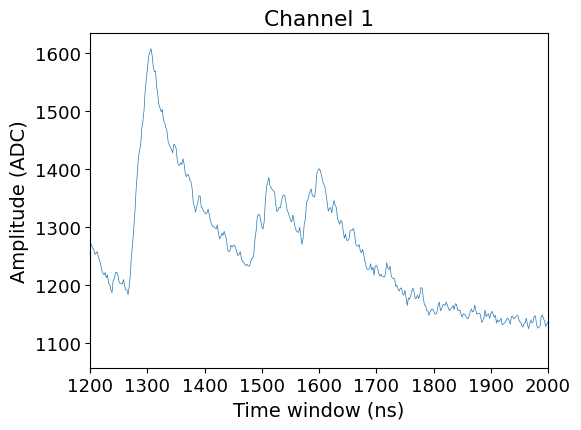

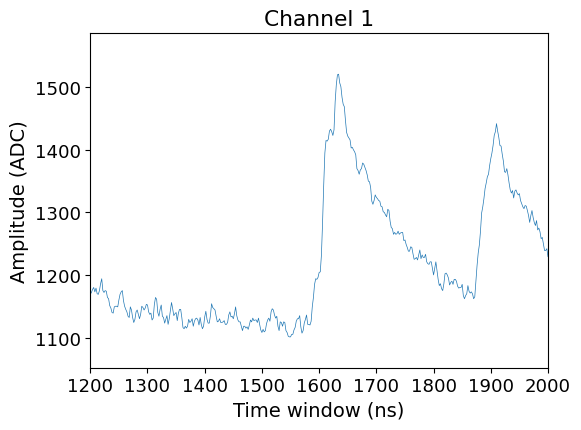

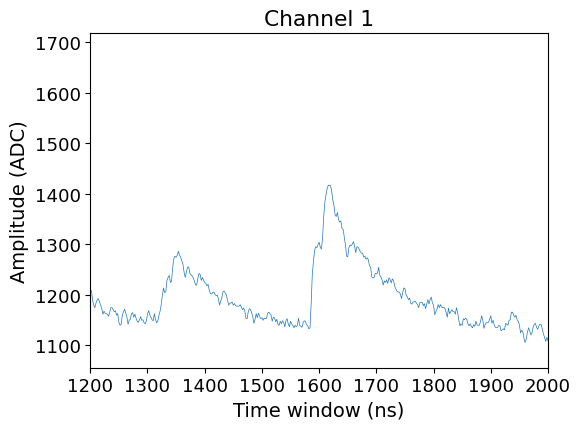

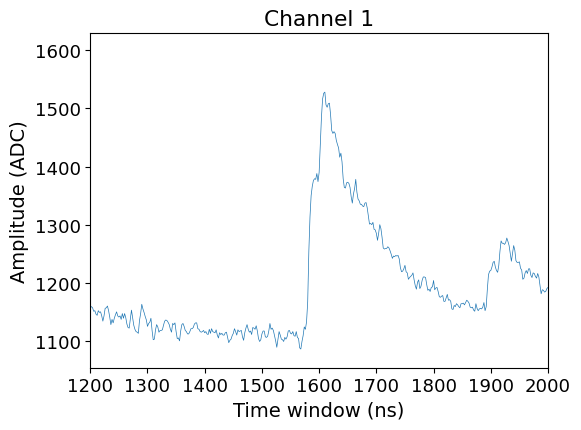

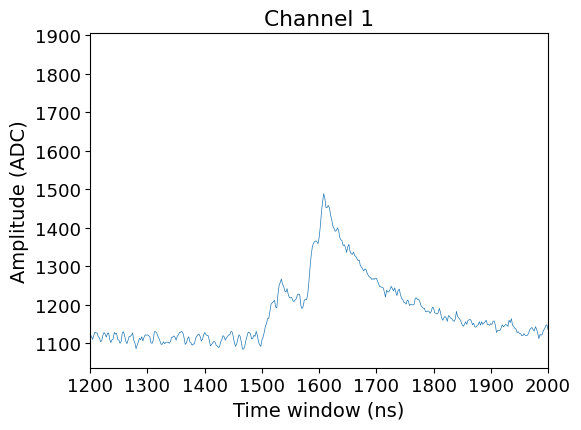

In [13]:
channel = 1
for evt in range(10):
    plt.figure(figsize=(6, 4.5))
    wf2 = np.array(RawTree1[f'chan0/rdigi'].array())[evt]
    plt.plot(2*np.arange(len(wf2)), wf2, linewidth=0.5)
    plt.xlabel('Time window (ns)', fontsize=14)
    plt.ylabel('Amplitude (ADC)', fontsize=14)
    plt.xlim(1200,2000)
    plt.title(f"Channel {channel}")
    plt.tight_layout()
    plt.show()

### Analyze spectra

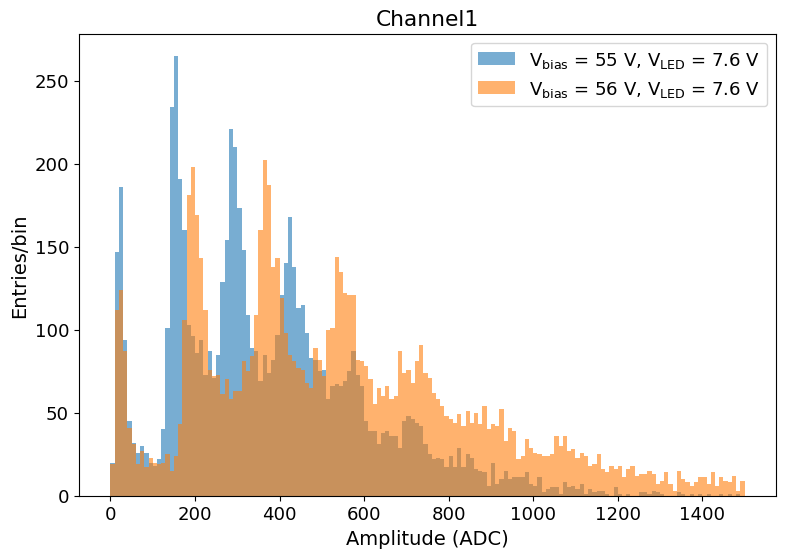

In [14]:
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 7.6 V')
plt.hist(all_max_data[channel_v(channel=1, vbias=56, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V$_{\mathrm{bias}}$ = 56 V, V$_{\mathrm{LED}}$ = 7.6 V')
plt.title('Channel1')
plt.xlabel('Amplitude (ADC)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

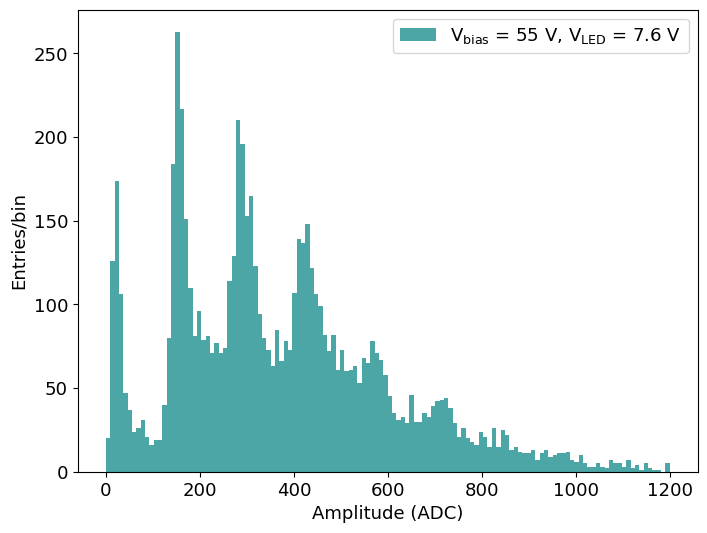

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.6)], bins=130, range=(0, 1200), label='V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 7.6 V', color='teal', alpha=0.7)
#plt.hist(all_max_data[channel_v(channel=1, vbias=56, vled=7.6)], bins=150, range=(0, 1300), label='V$_{\mathrm{bias}}$ = 56 V, V$_{\mathrm{LED}}$ = 7.6 V', histtype='step', linewidth=1.2, color='dimgrey')
plt.xlabel('Amplitude (ADC)', fontsize=13)
plt.ylabel('Entries/bin',      fontsize=13)
plt.legend()
#plt.savefig('/Users/romoluque_c/LEGEND/BACON/plots/spectrum_dark_box.pdf', bbox_inches='tight')
plt.show()

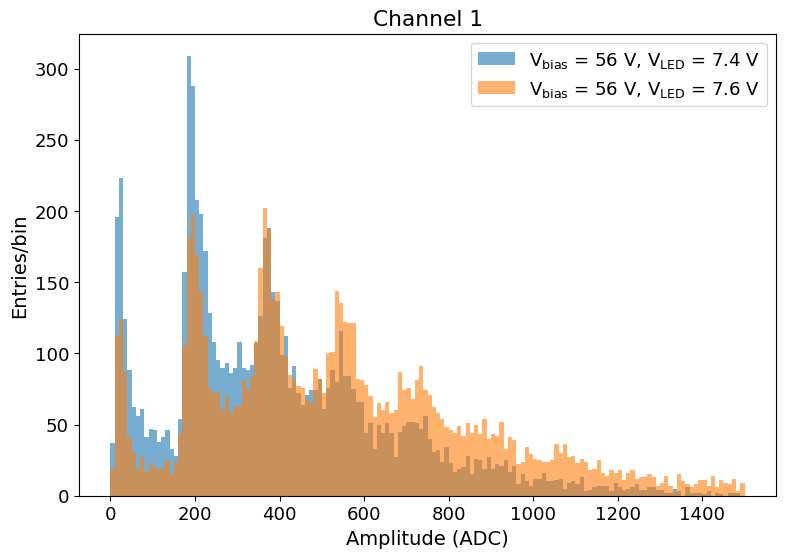

In [16]:
plt.hist(all_max_data[channel_v(channel=1, vbias=56, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='V$_{\mathrm{bias}}$ = 56 V, V$_{\mathrm{LED}}$ = 7.4 V')
plt.hist(all_max_data[channel_v(channel=1, vbias=56, vled=7.6)], bins=150, range=(0, 1500), alpha=0.6, label='V$_{\mathrm{bias}}$ = 56 V, V$_{\mathrm{LED}}$ = 7.6 V')
plt.title('Channel 1')
plt.xlabel('Amplitude (ADC)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

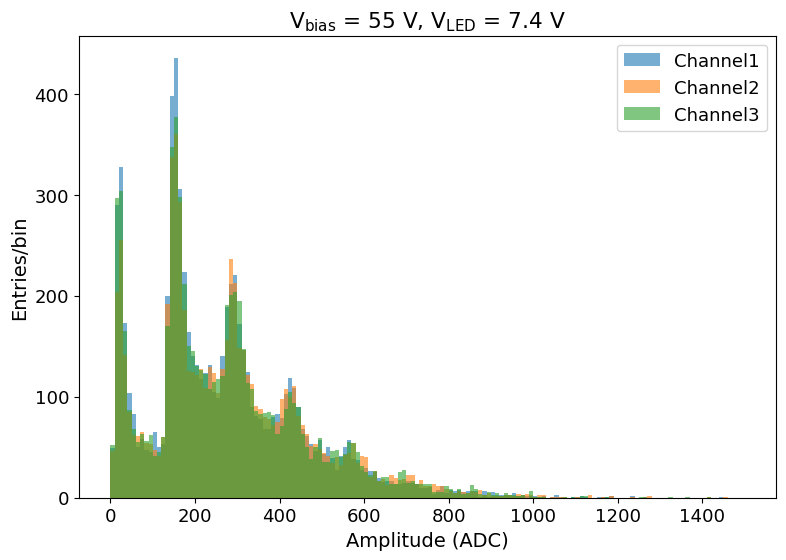

In [17]:
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel1')
plt.hist(all_max_data[channel_v(channel=2, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel2')
plt.hist(all_max_data[channel_v(channel=3, vbias=55, vled=7.4)], bins=150, range=(0, 1500), alpha=0.6, label='Channel3')
plt.title('V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 7.4 V')
plt.xlabel('Amplitude (ADC)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

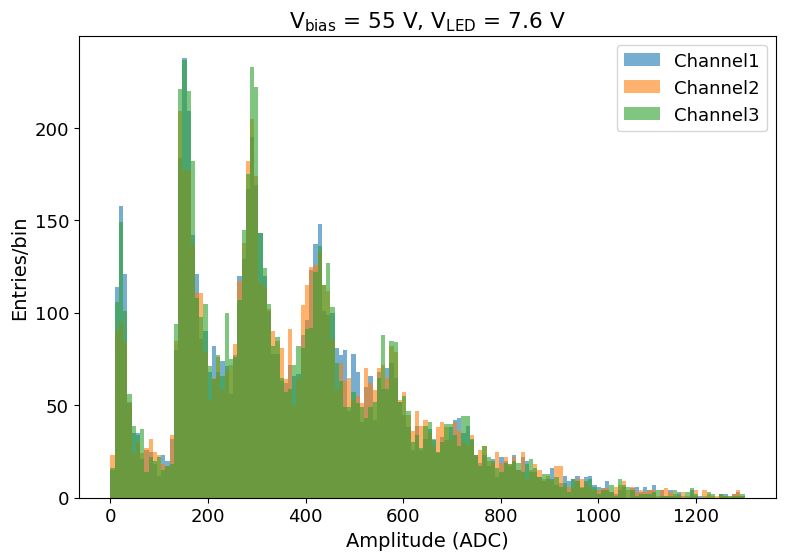

In [18]:
plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.6)], bins=150, range=(0, 1300), alpha=0.6, label='Channel1')
plt.hist(all_max_data[channel_v(channel=2, vbias=55, vled=7.6)], bins=150, range=(0, 1300), alpha=0.6, label='Channel2')
plt.hist(all_max_data[channel_v(channel=3, vbias=55, vled=7.6)], bins=150, range=(0, 1300), alpha=0.6, label='Channel3')
plt.title('V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 7.6 V')
plt.xlabel('Amplitude (ADC)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

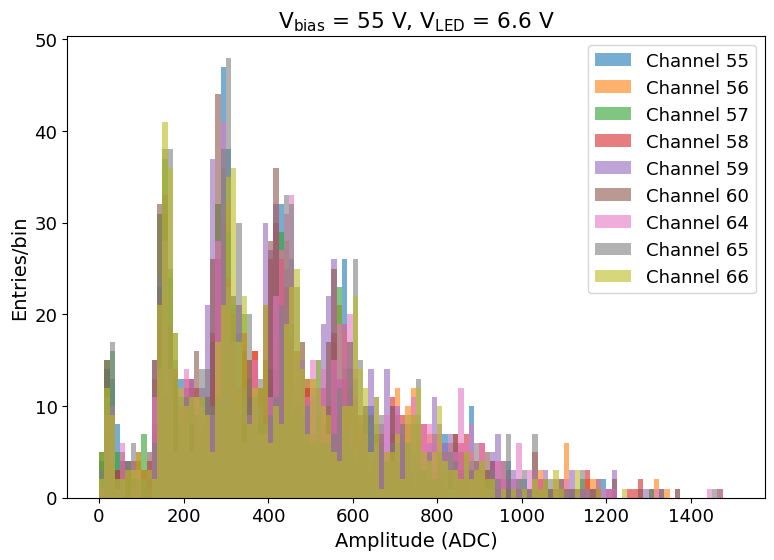

In [19]:
vled = 6.6
vb   = 55
for ch in [55, 56, 57, 58, 59, 60, 64, 65, 66]:
    plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=120, range=(0, 1500), alpha=0.6, label=f'Channel {ch}')
plt.title('V$_{\mathrm{bias}}$ = 55 V, V$_{\mathrm{LED}}$ = 6.6 V')
plt.xlabel('Amplitude (ADC)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

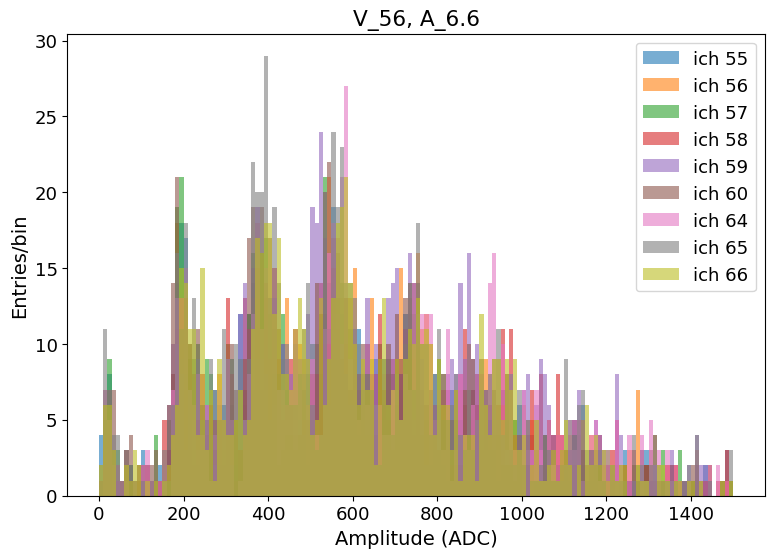

In [20]:
vled = 6.6
vb   = 56
for ch in [55, 56, 57, 58, 59, 60, 64, 65, 66]:
    plt.hist(all_max_data[channel_v(channel=ch, vbias=vb, vled=vled)], bins=150, range=(0, 1500), alpha=0.6, label=f'ich {ch}')
plt.title(f'V_{vb}, A_{vled}')
plt.xlabel('Amplitude (ADC)', fontsize=14)
plt.ylabel('Entries/bin',      fontsize=14)
#plt.xlim(0, 1500)
plt.legend()
plt.show()

### Fit

In [21]:
# Define the function for a single Gaussian peak
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

# Define the function for multiple Gaussian peaks
def multi_gaussian(x, *params):
    n_peaks = len(params) // 3
    y       = np.zeros_like(x)
    for i in range(n_peaks):
        amplitude = params[i * 3]
        mean      = params[i * 3 + 1]
        stddev    = params[i * 3 + 2]
        y += gaussian(x, amplitude, mean, stddev)
    return y

def shift_to_bin_centers(x):
    """
    Return bin centers, given bin lower edges.
    """
    return x[:-1] + np.diff(x) * 0.5

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

def plot_linear_fit(y, yerr):
    x    = np.arange(len(y))+1
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope*x + intercept
    
    fig = plt.figure(figsize=(8,5))
    plt.errorbar(x, y, yerr=yerr, marker='_', markersize=5, linestyle='', c='k', label=f'Measured gain values')
    plt.plot(x, line, color='r', alpha=0.7, label=f'Fit: y = x*{round(slope, 2)} - {round(np.abs(intercept), 2)}, \n     R$^2$ = {truncate(r_value, 2)}')
    
    plt.xlabel('Peak number')
    plt.ylabel('Mu from fit (ADC)')
    plt.legend(fontsize=14, loc='upper left')
    plt.show()
    return slope

In [22]:
all_max_data;

### Fit spectra

In [23]:
def extract_gain_and_mean(channel, vbias, vled, bins, prange, initial_guess):
    
    data = all_max_data[channel_v(channel=channel, vbias=vbias, vled=vled)]
    
    print()
    print('------------------------------------------------------------------------------------------')
    print(f'-------    Channel {channel}, Vbias = {vbias} V, VLED = {vled}   ------------------------')
    print('------------------------------------------------------------------------------------------')
    print()

    plt.figure(figsize=(7, 5))
    y, x, _ = plt.hist(data, bins=bins, range=prange, alpha=0.6, label=f'Channel{channel}')
    #plt.axvline(x=740, color='r')
    plt.xlabel('Amplitude (ADC)', fontsize=15)
    plt.ylabel('Entries/bin',      fontsize=15)
    plt.title(f"Spectrum for channel {channel} (height of the peaks)", fontsize=15)
    plt.show()
    
    popt, pcov = curve_fit(multi_gaussian, shift_to_bin_centers(x), y, p0=initial_guess)
    
    plt.figure(figsize=(7, 5))
    plt.step(shift_to_bin_centers(x), y, label='Spectrum')
    plt.plot(x, multi_gaussian(x, *popt), 'r--', label='Fit')
    plt.xlabel('Amplitude (ADC)', fontsize=15)
    plt.ylabel('Entries/bin',      fontsize=15)
    plt.title(f"Channel {channel}",     fontsize=15)
    plt.legend()
    plt.show()
    
    perr         = np.sqrt(np.diag(pcov))    
    means_ch     = np.array([popt[i*3+1] for i in range(len(popt)//3)])
    means_ch_err = np.array([perr[i*3+1] for i in range(len(perr)//3)])
    
    gain_ch = plot_linear_fit(means_ch[:4], means_ch_err[:4])
    
    return gain_ch, means_ch

In [24]:
all_gains = {}
all_means = {}


------------------------------------------------------------------------------------------
-------    Channel 1, Vbias = 56 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



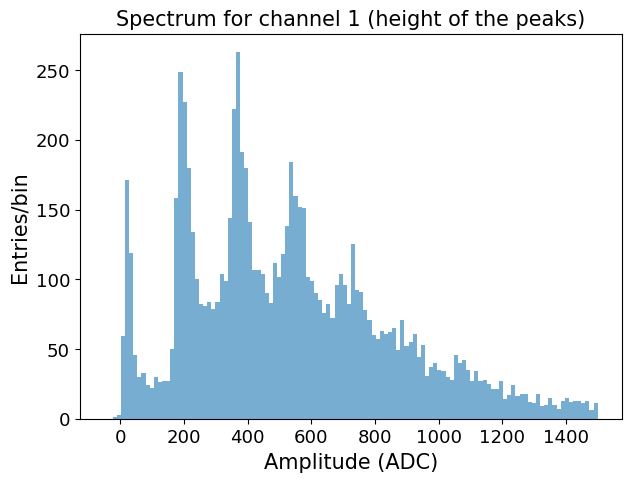

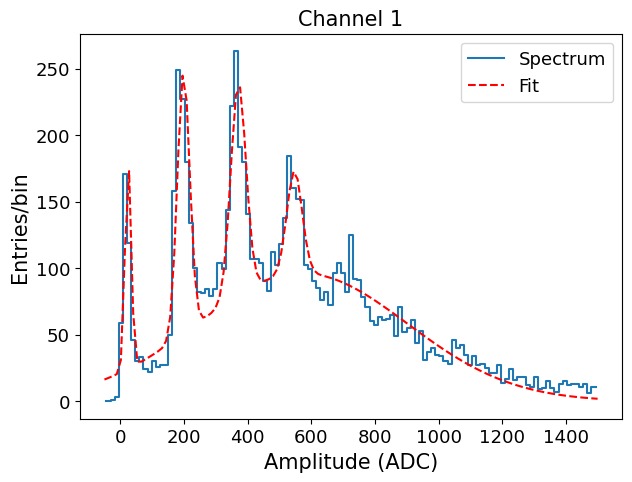

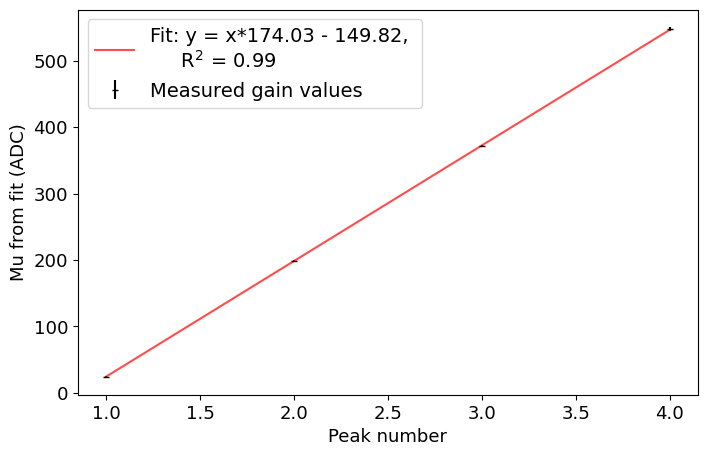


------------------------------------------------------------------------------------------
-------    Channel 2, Vbias = 56 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



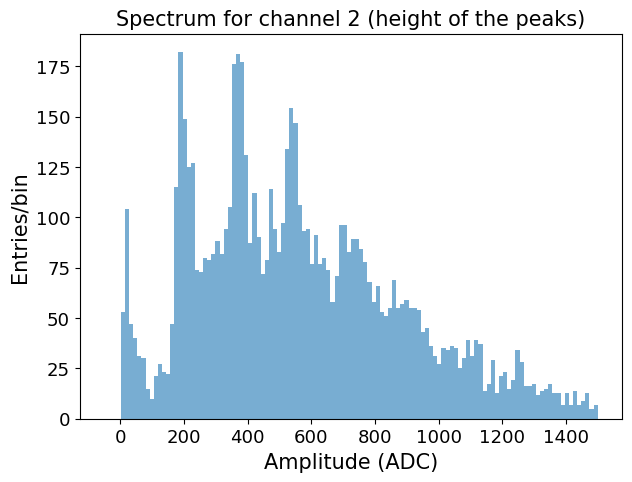

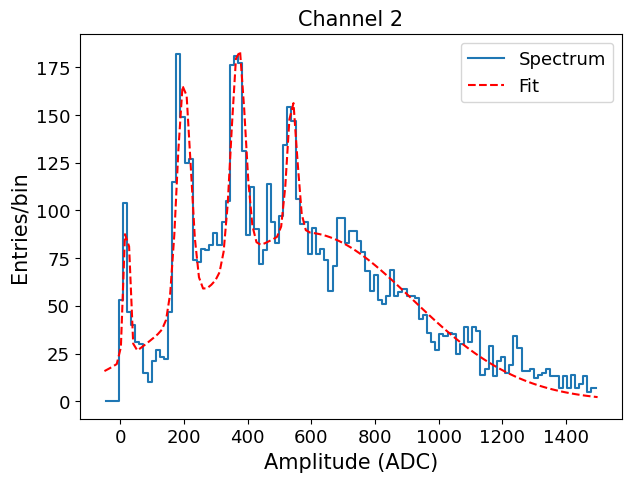

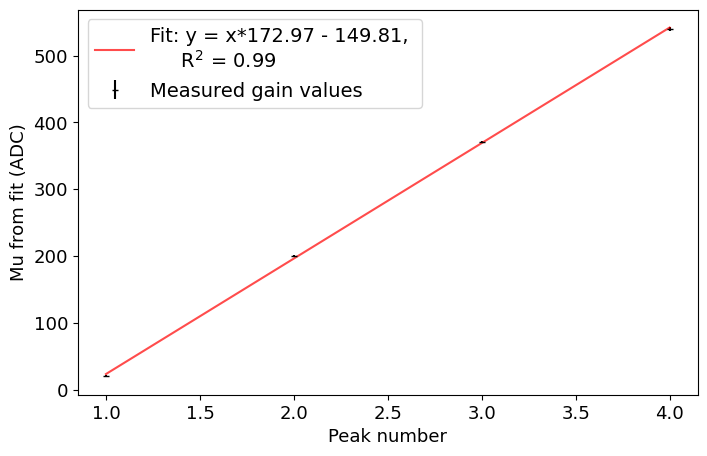


------------------------------------------------------------------------------------------
-------    Channel 3, Vbias = 56 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



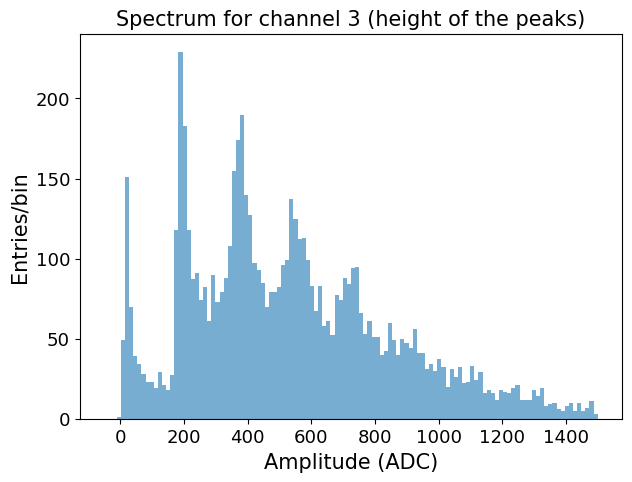

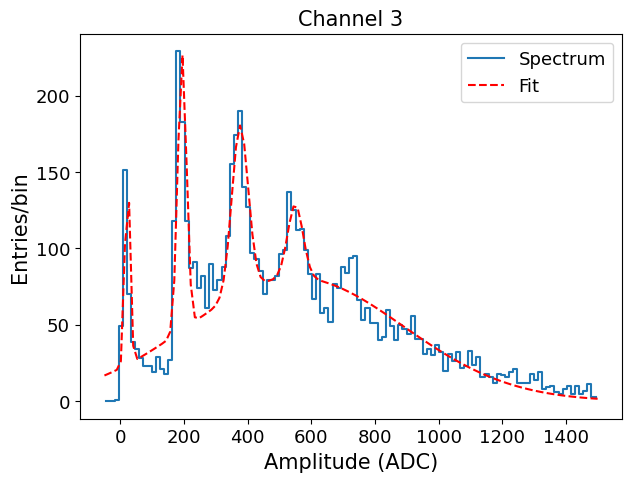

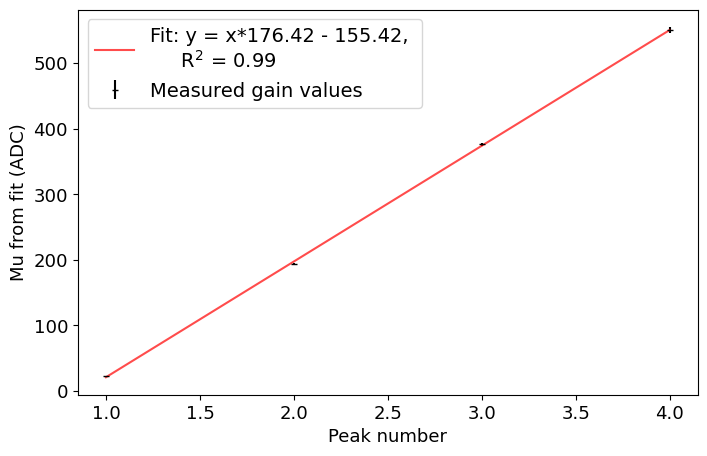


------------------------------------------------------------------------------------------
-------    Channel 55, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



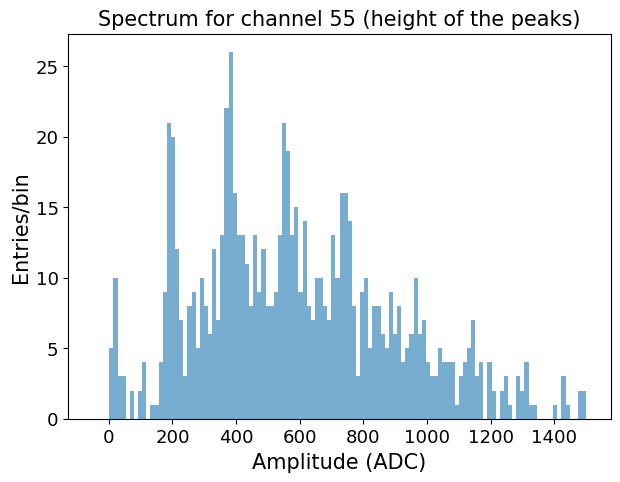

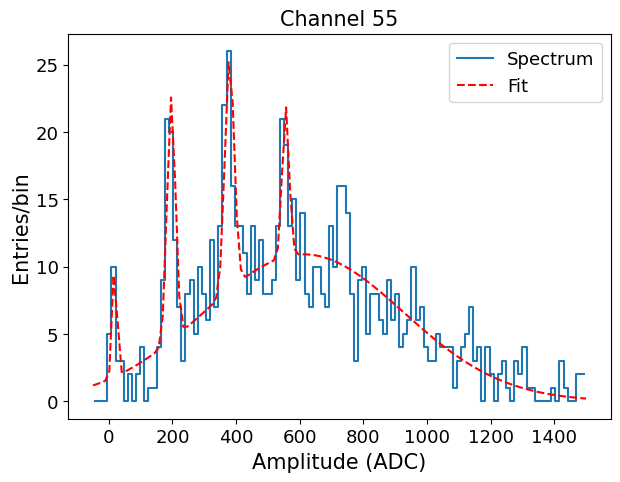

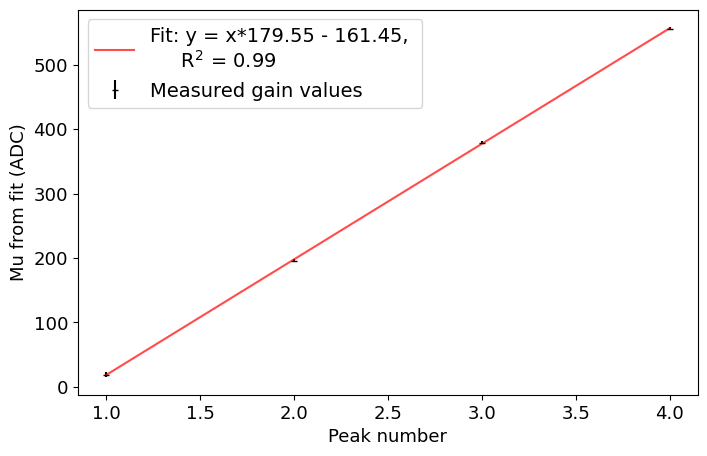


------------------------------------------------------------------------------------------
-------    Channel 56, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



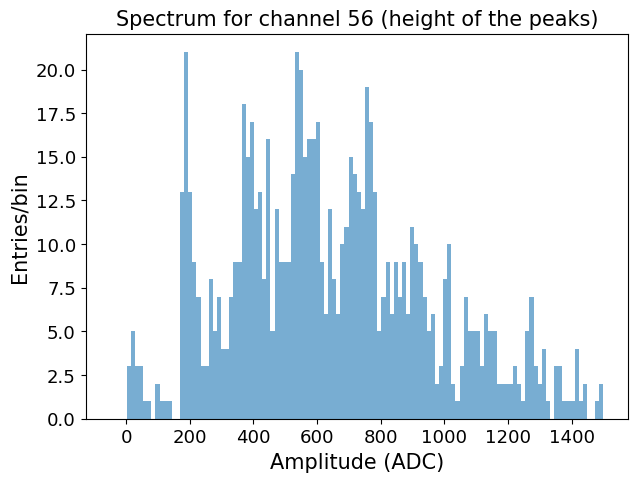

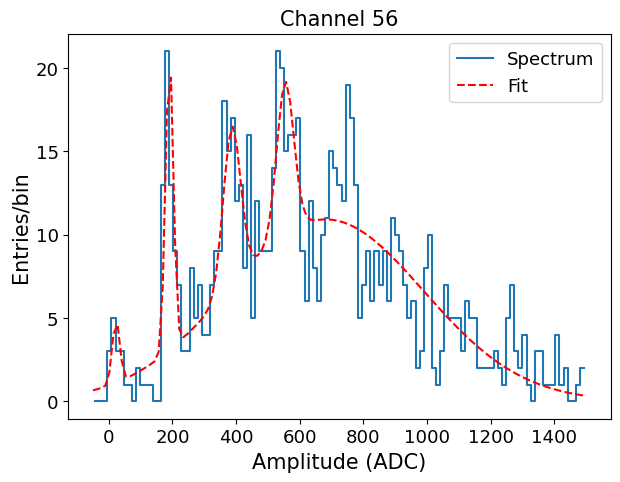

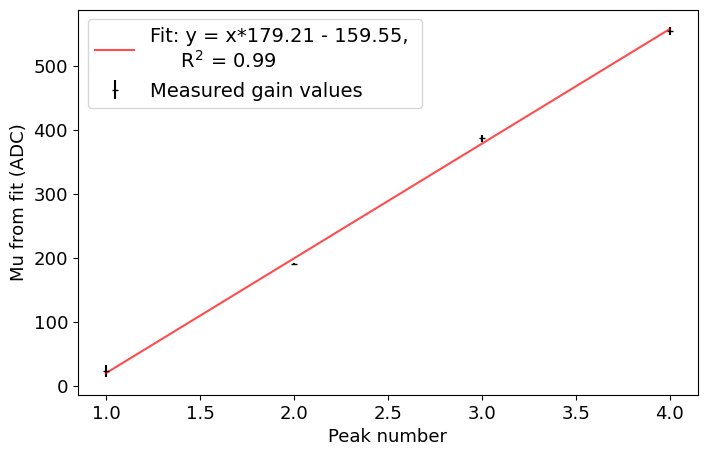


------------------------------------------------------------------------------------------
-------    Channel 57, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



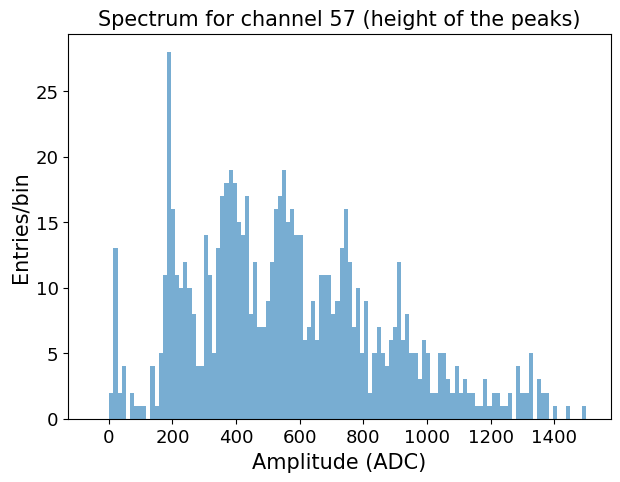

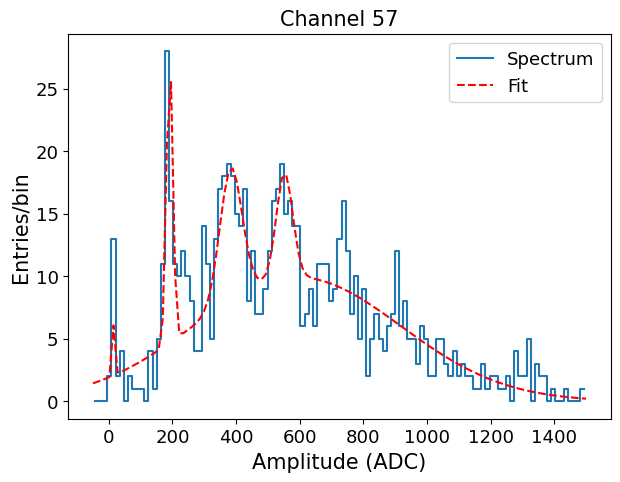

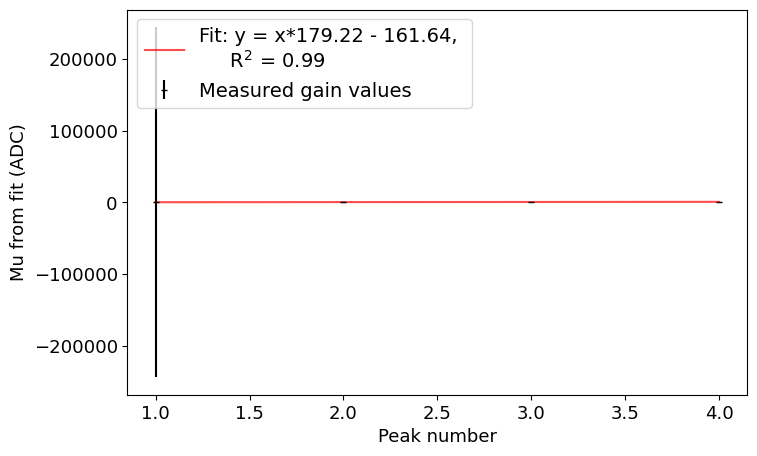


------------------------------------------------------------------------------------------
-------    Channel 58, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



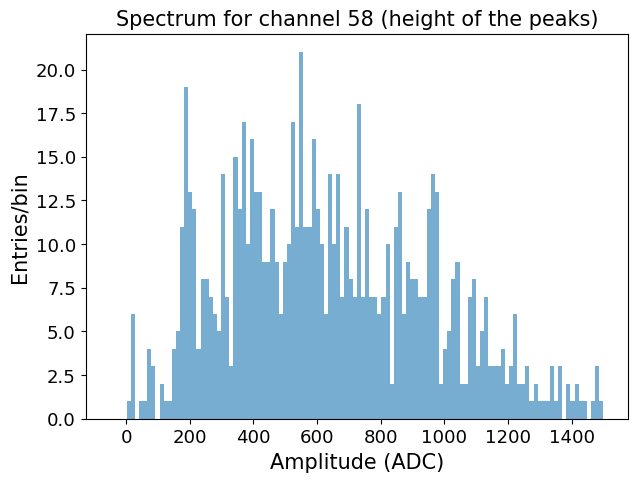

/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


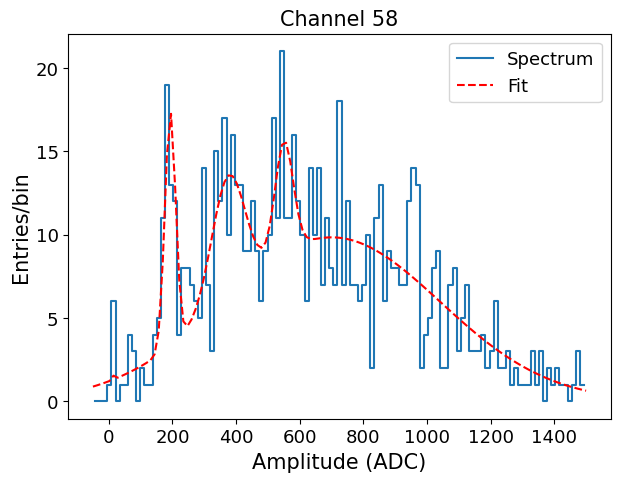

/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


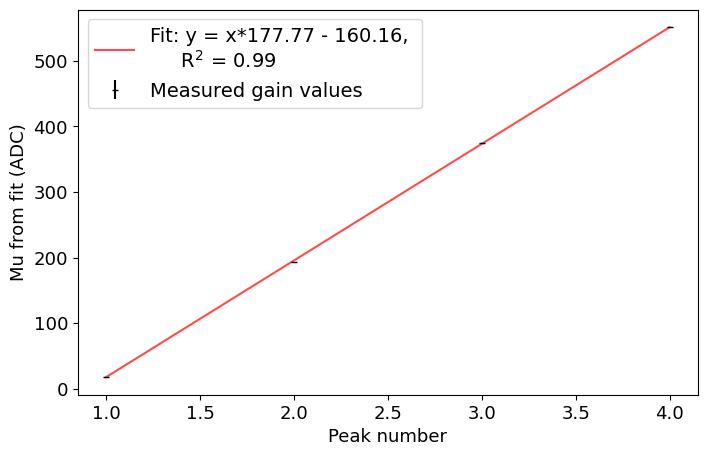


------------------------------------------------------------------------------------------
-------    Channel 59, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



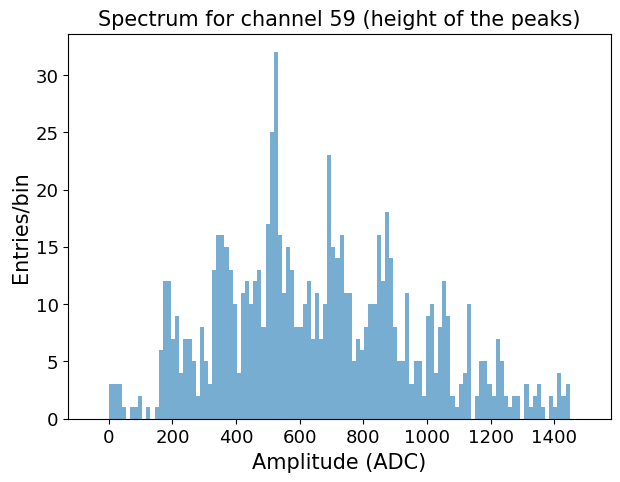

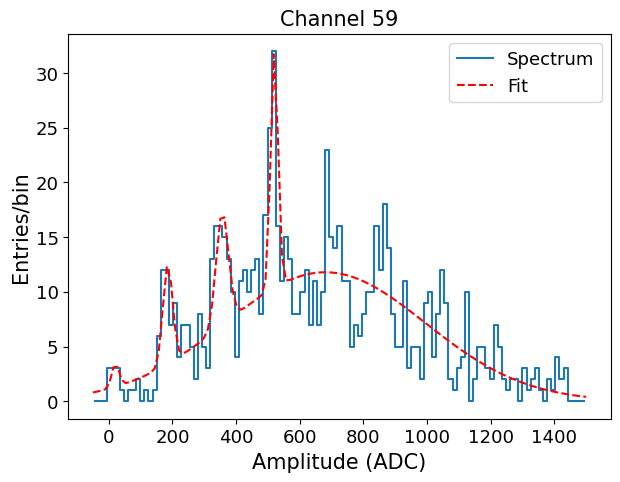

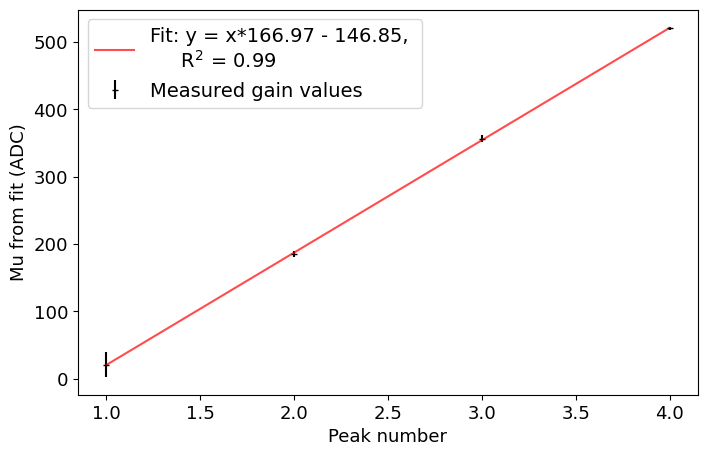


------------------------------------------------------------------------------------------
-------    Channel 60, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



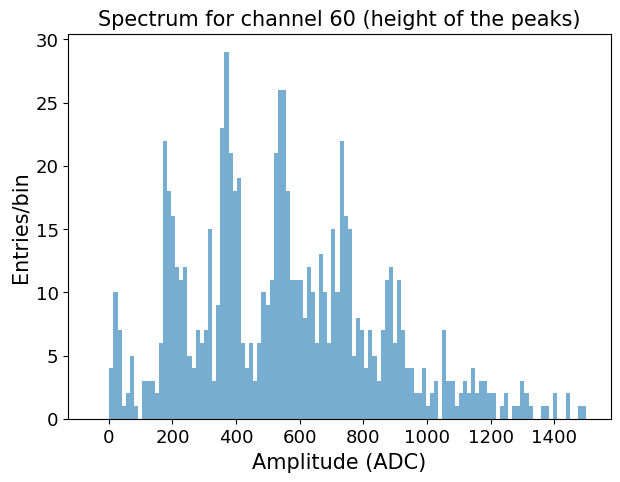

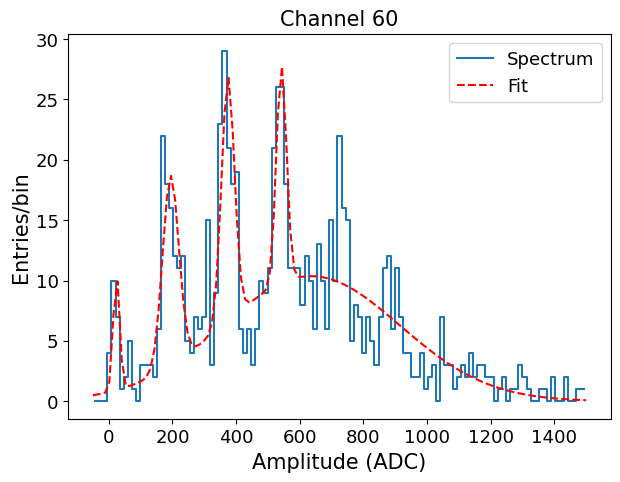

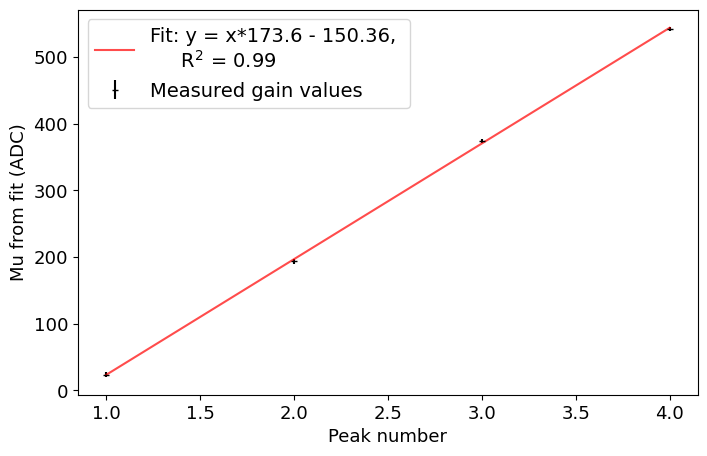


------------------------------------------------------------------------------------------
-------    Channel 64, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



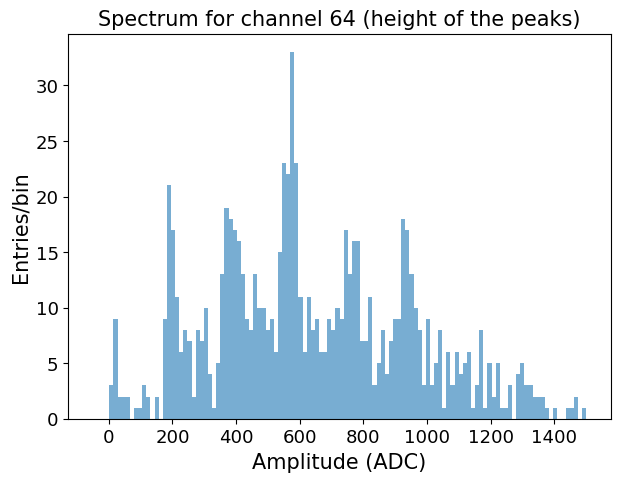

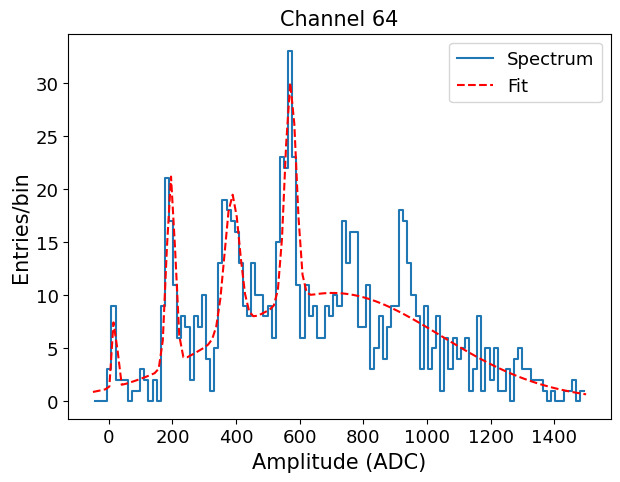

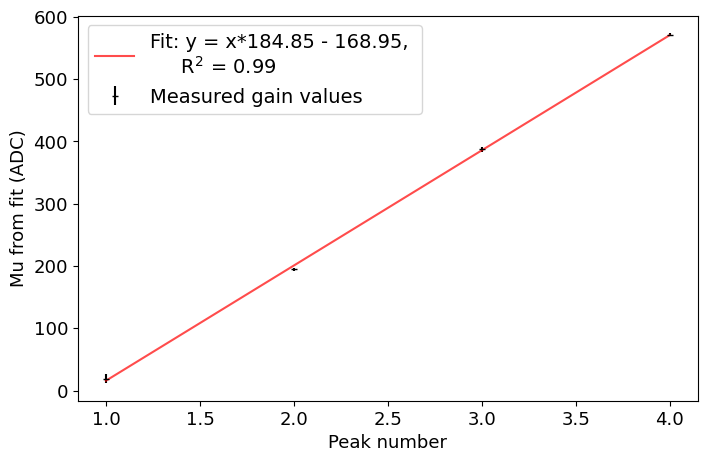


------------------------------------------------------------------------------------------
-------    Channel 65, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



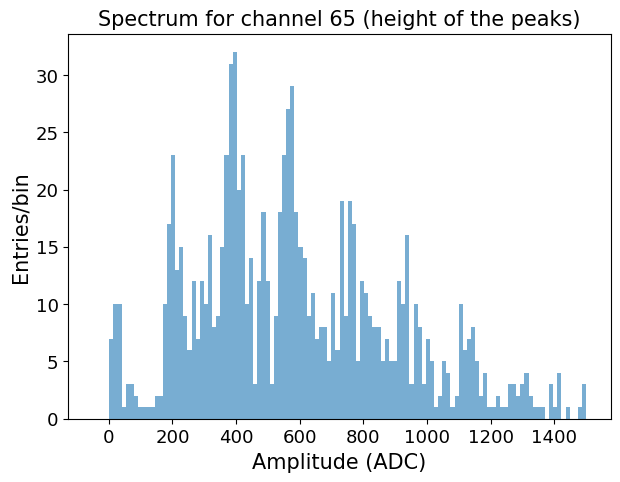

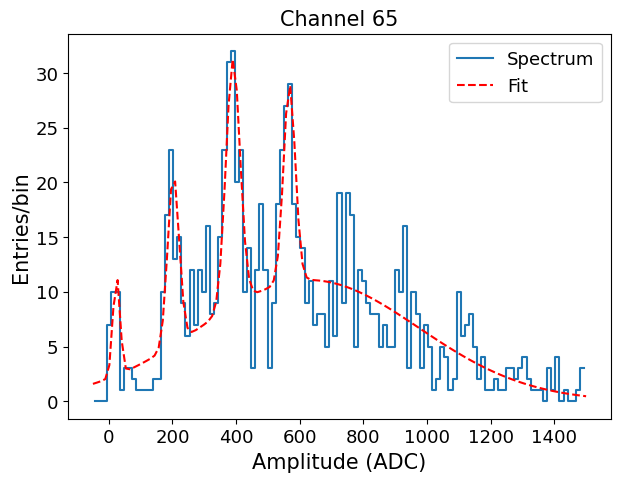

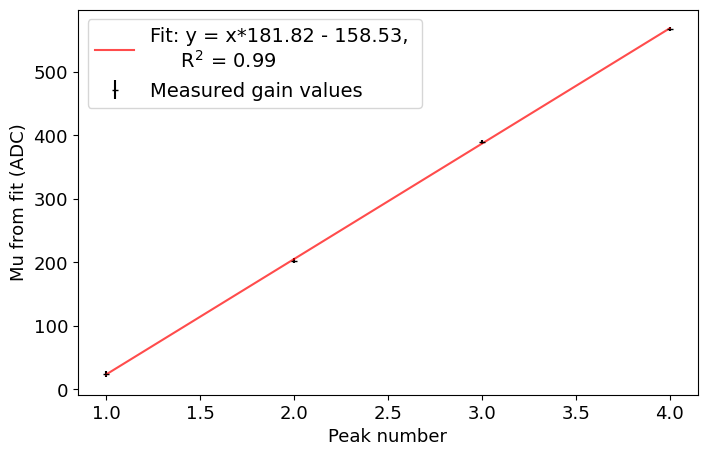


------------------------------------------------------------------------------------------
-------    Channel 66, Vbias = 56 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



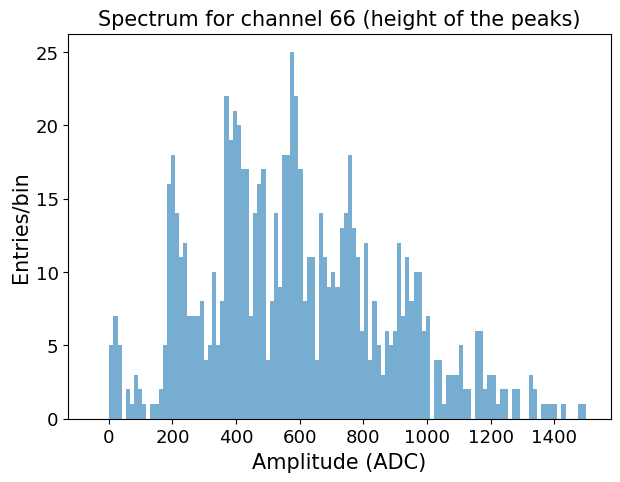

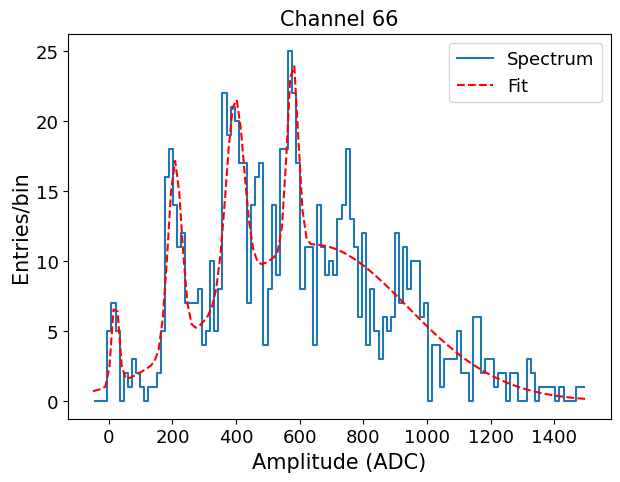

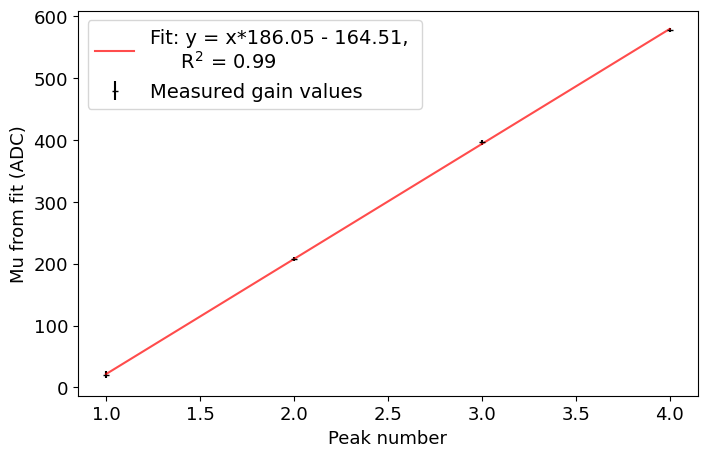

In [25]:
vb = 56
for ch, vled in zip(channels, vleds0):
    vl = vled + 0.6
    initial_guess  = [200, 20, 10, 250, 200, 15, 120, 400, 15, 60, 550, 15, 15, 740, 10]
    gain, ch_means = extract_gain_and_mean(channel       = ch,
                                           vbias         = vb,
                                           vled          = vl,
                                           bins          = 120,
                                           prange        = (-50, 1500),
                                           initial_guess = initial_guess)
    
    all_gains[channel_v(channel=ch, vbias=vb, vled=vl)] = gain
    all_means[channel_v(channel=ch, vbias=vb, vled=vl)] = ch_means

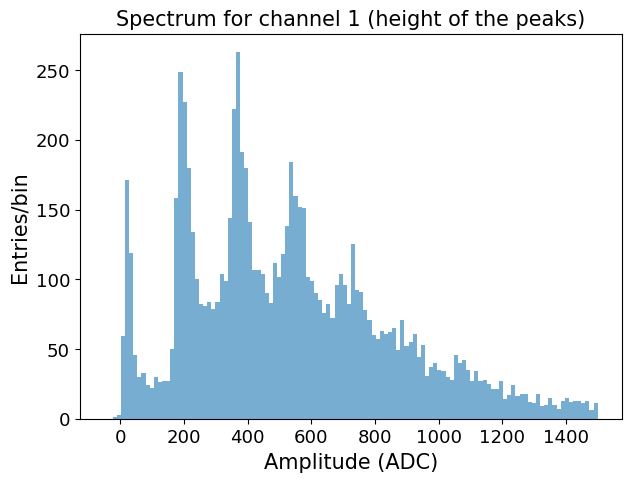

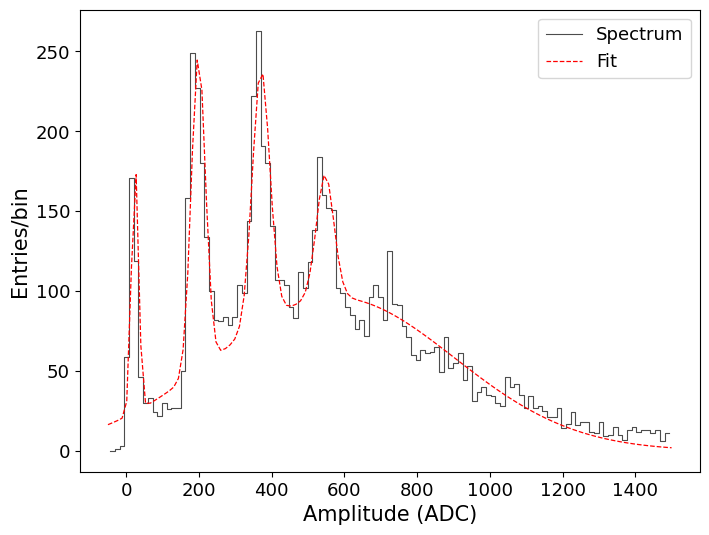

In [26]:
vb = 56
ch = 1
vl = 7.6
prange = (-50, 1500)

initial_guess  = [200, 20, 10, 250, 200, 15, 120, 400, 15, 60, 550, 15, 15, 740, 10]

data = all_max_data[channel_v(channel=ch, vbias=vb, vled=vl)]

plt.figure(figsize=(7, 5))
y, x, _ = plt.hist(data, bins=120, range=prange, alpha=0.6, label=f'Channel{ch}')
plt.xlabel('Amplitude (ADC)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Spectrum for channel {channel} (height of the peaks)", fontsize=15)
plt.show()

popt, pcov = curve_fit(multi_gaussian, shift_to_bin_centers(x), y, p0=initial_guess)

plt.figure(figsize=(8, 6))
plt.step(shift_to_bin_centers(x), y, label='Spectrum', color='k', linewidth=0.8, alpha=0.7)
plt.plot(x, multi_gaussian(x, *popt), 'r--', label='Fit', linewidth=0.9)
plt.xlabel('Amplitude (ADC)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.legend()
#plt.savefig('/Users/romoluque_c/LEGEND/BACON/plots/spectrum_black_box_fitted.pdf', bbox_inches='tight')
plt.show()


------------------------------------------------------------------------------------------
-------    Channel 1, Vbias = 55 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



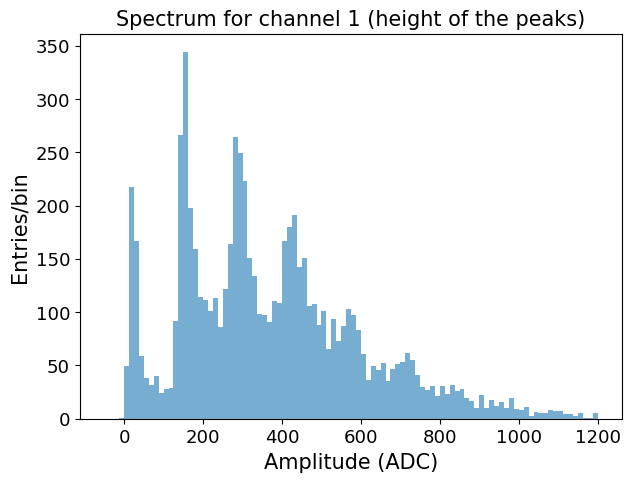

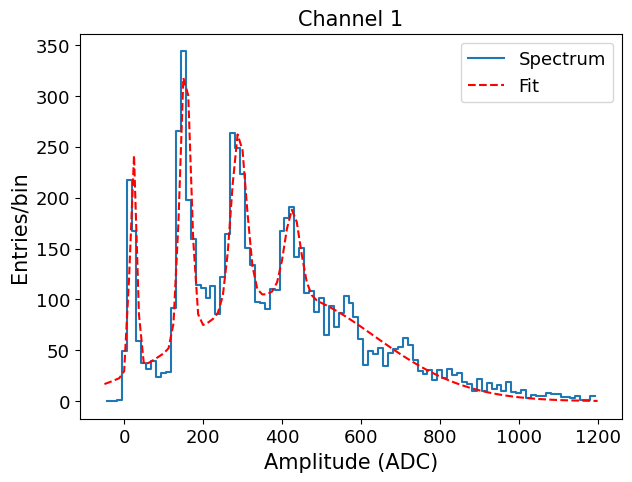

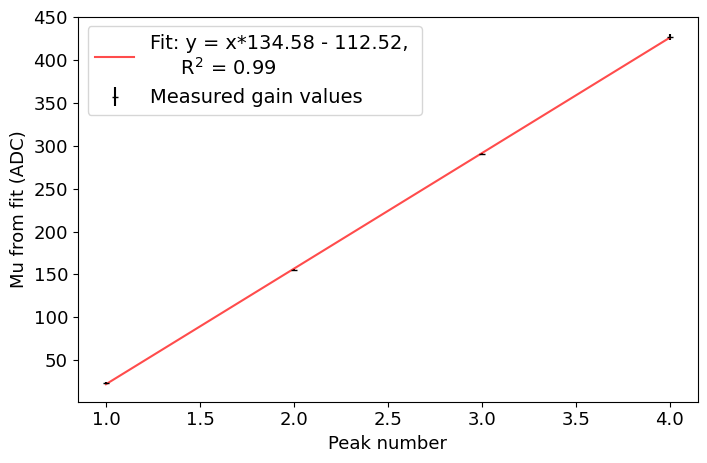


------------------------------------------------------------------------------------------
-------    Channel 2, Vbias = 55 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



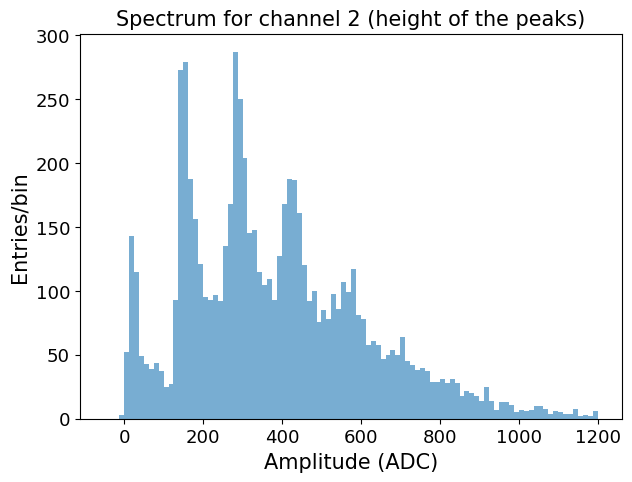

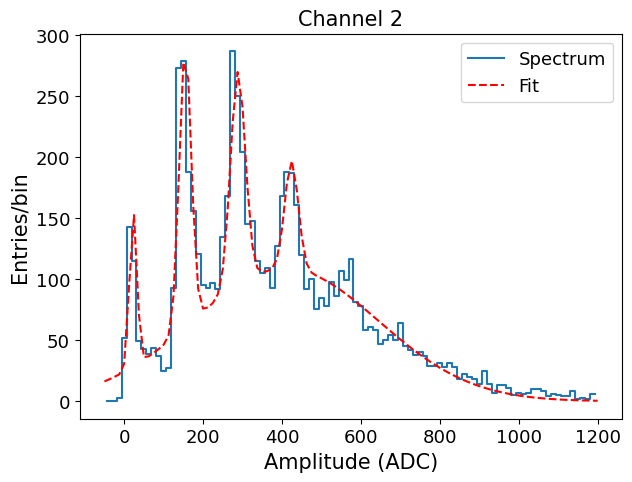

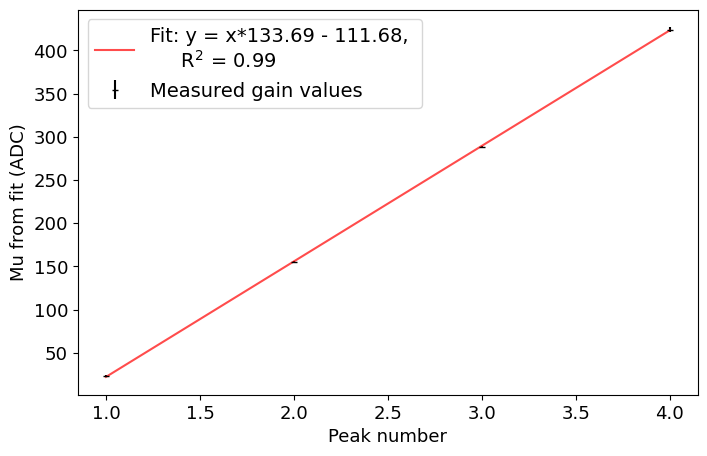


------------------------------------------------------------------------------------------
-------    Channel 3, Vbias = 55 V, VLED = 7.6   ------------------------
------------------------------------------------------------------------------------------



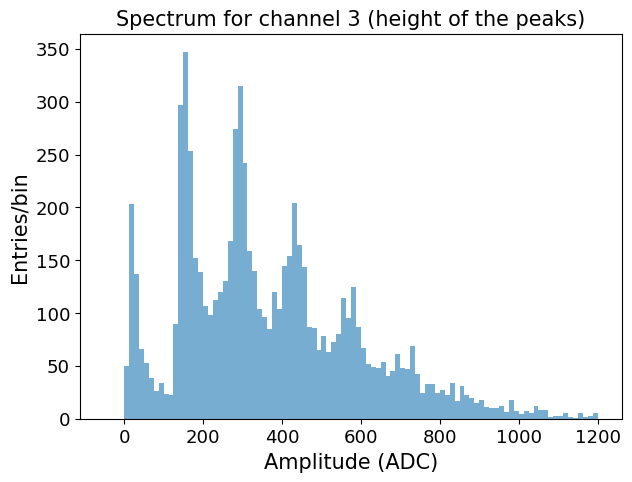

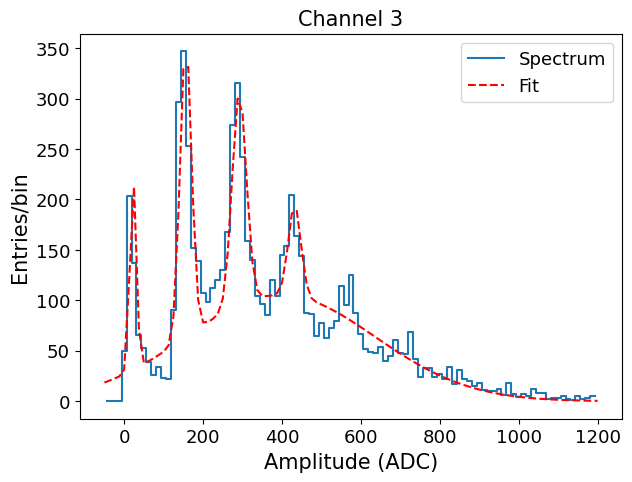

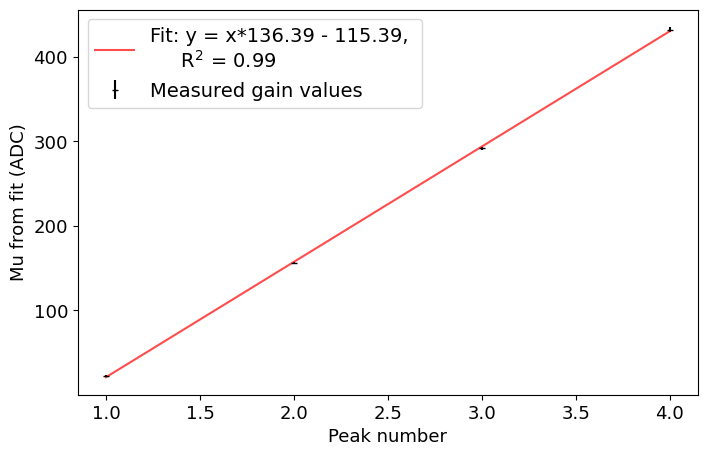


------------------------------------------------------------------------------------------
-------    Channel 55, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



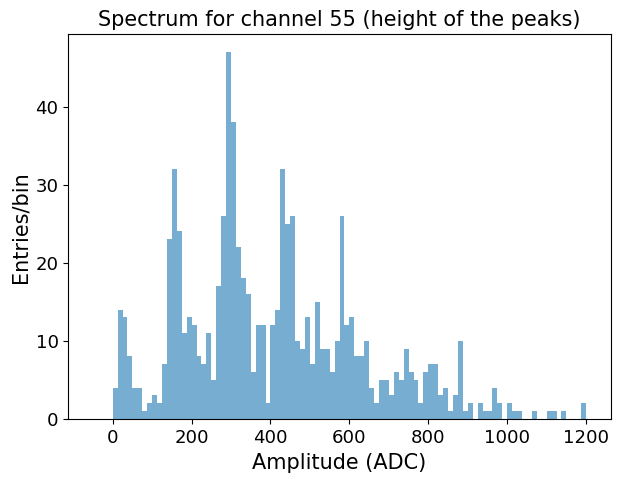

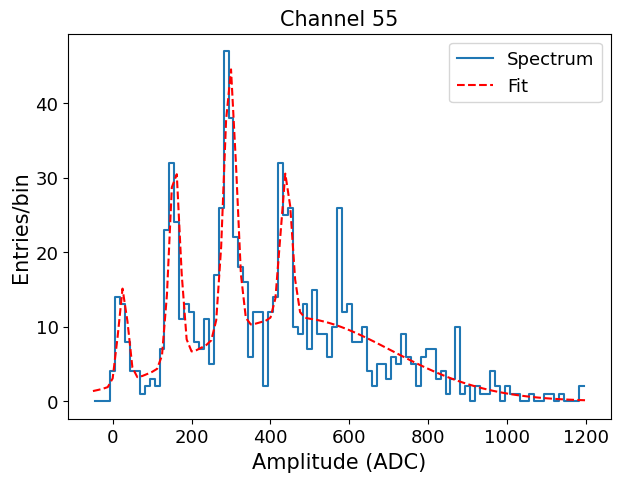

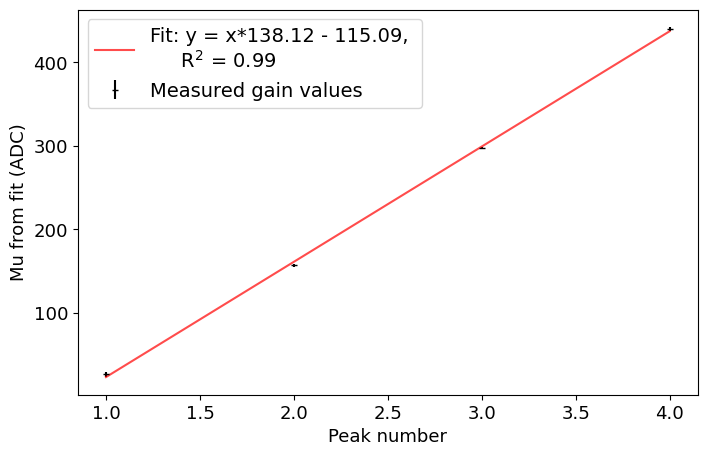


------------------------------------------------------------------------------------------
-------    Channel 56, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



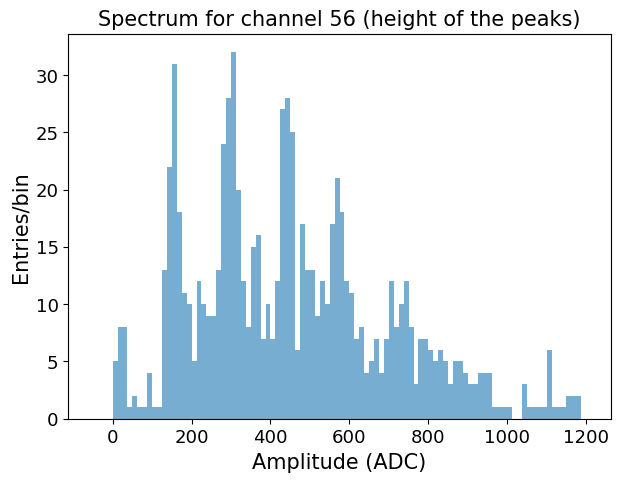

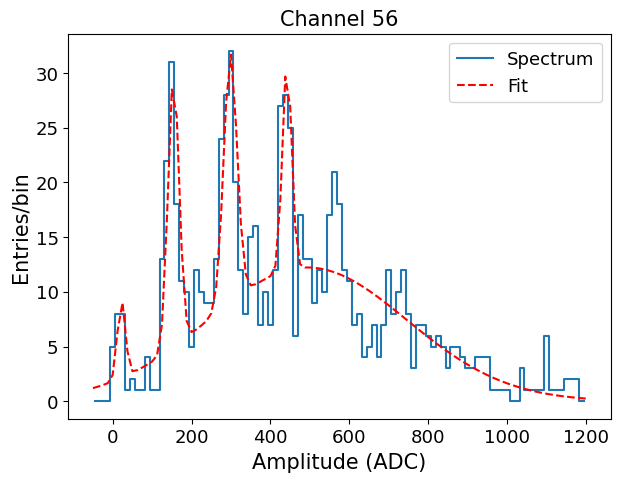

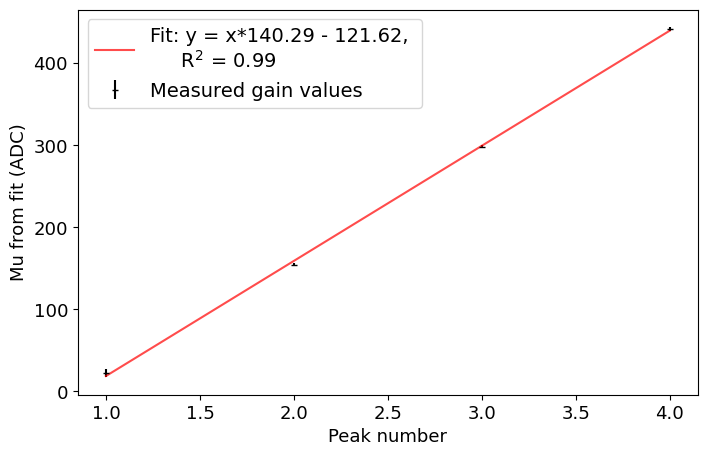


------------------------------------------------------------------------------------------
-------    Channel 57, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



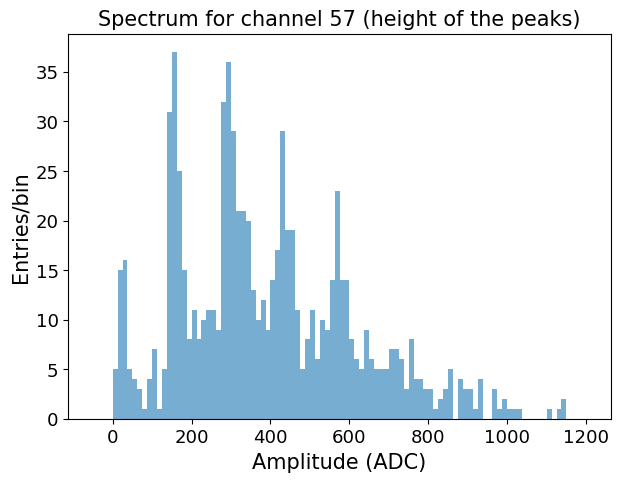

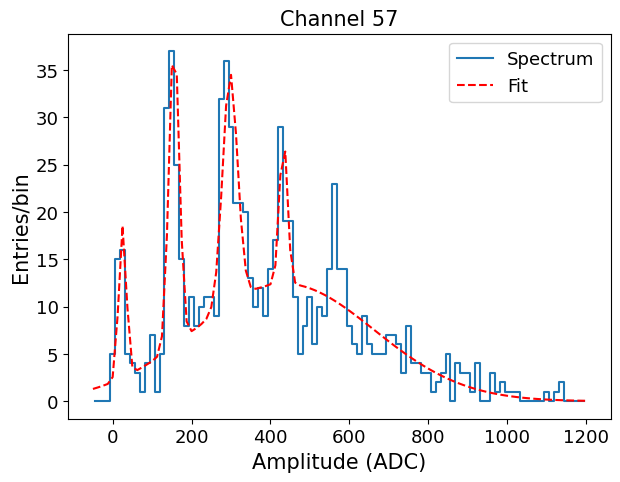

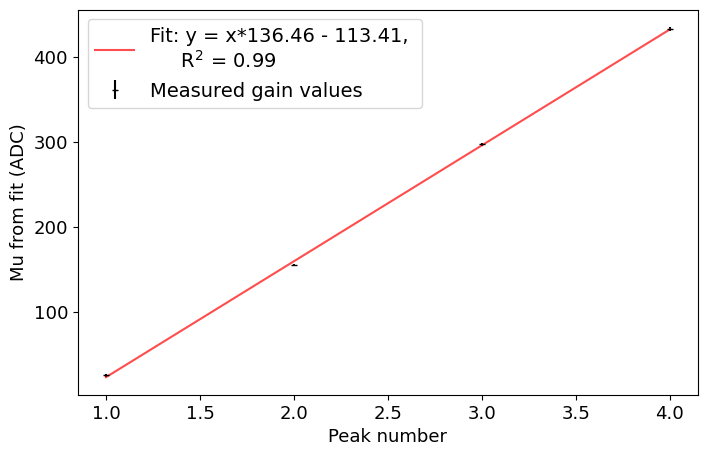


------------------------------------------------------------------------------------------
-------    Channel 58, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



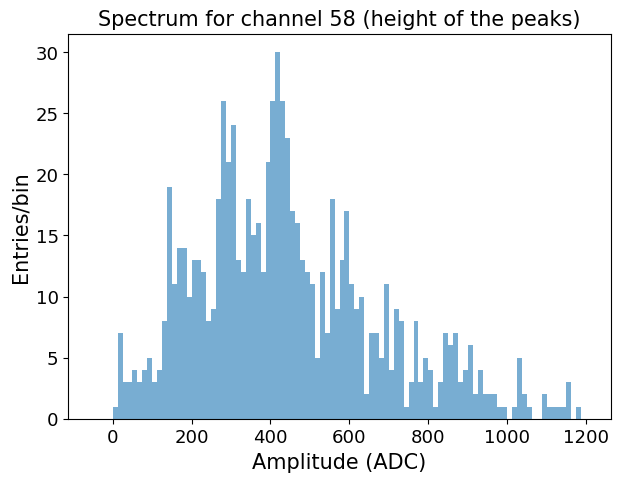

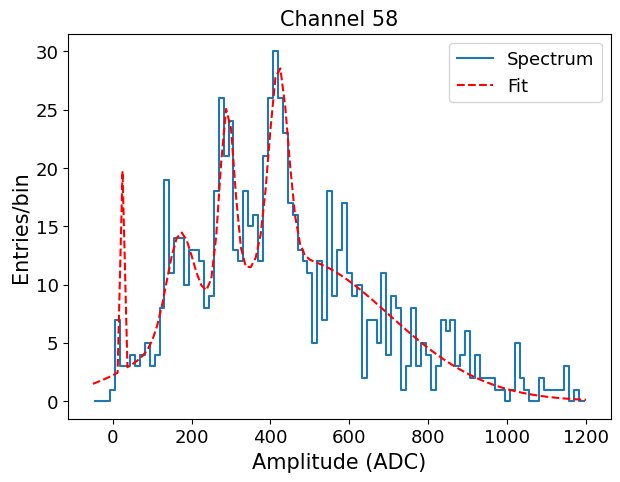

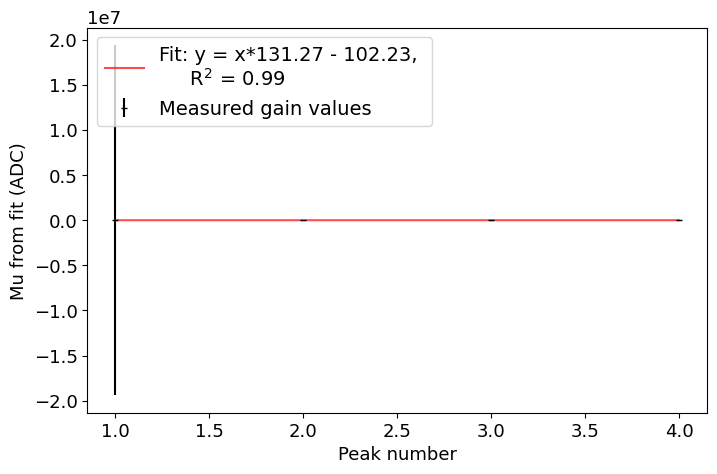


------------------------------------------------------------------------------------------
-------    Channel 59, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



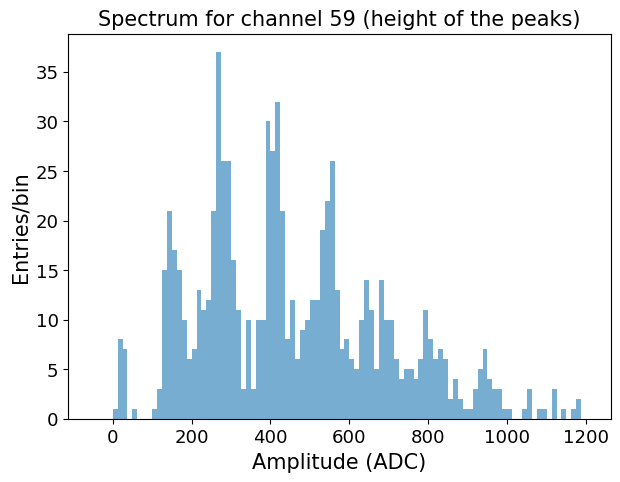

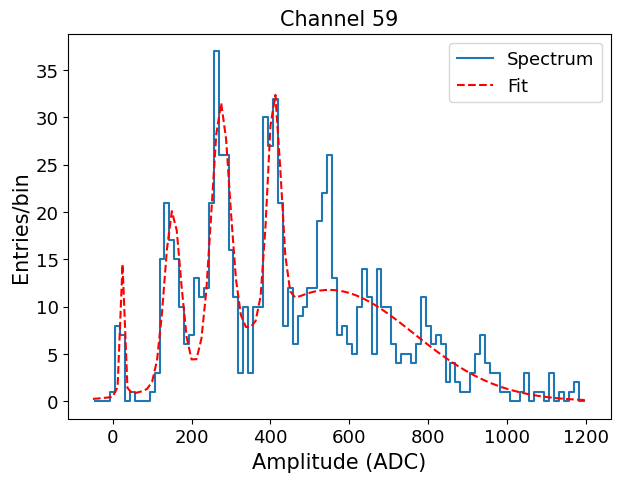

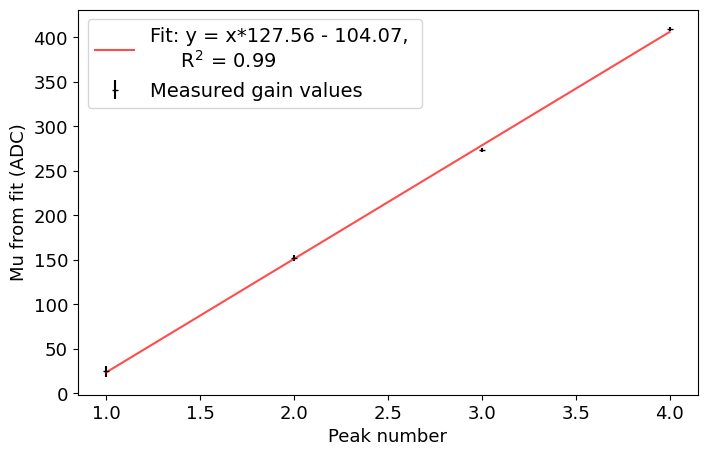


------------------------------------------------------------------------------------------
-------    Channel 60, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



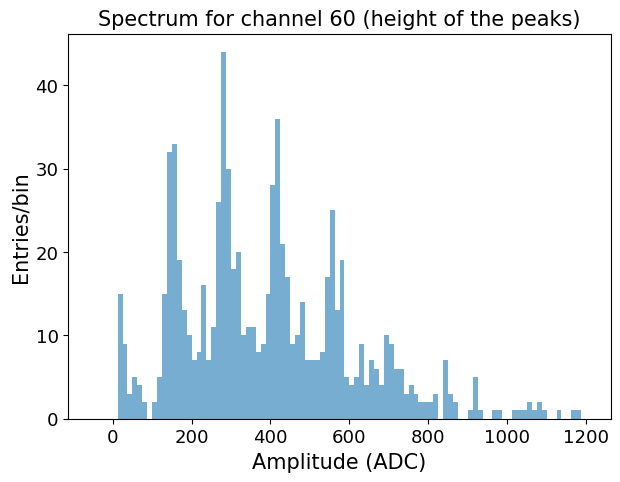

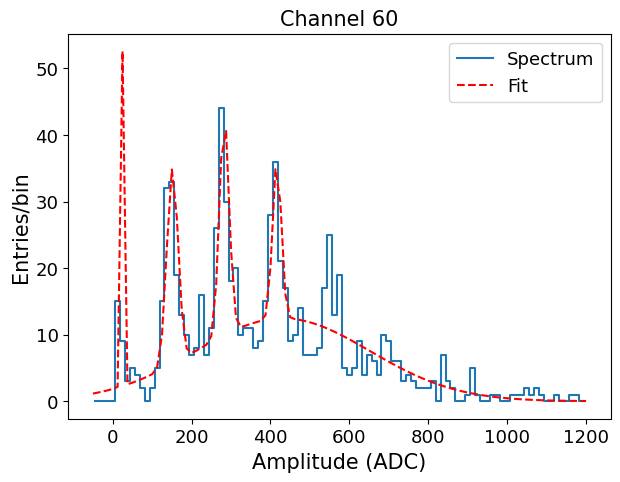

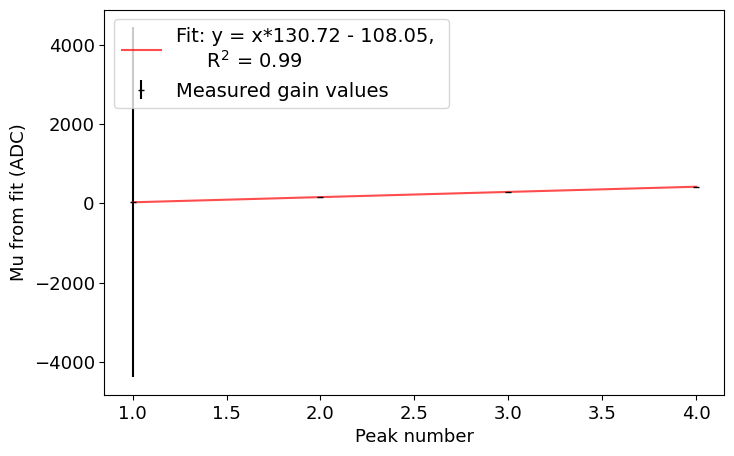


------------------------------------------------------------------------------------------
-------    Channel 64, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



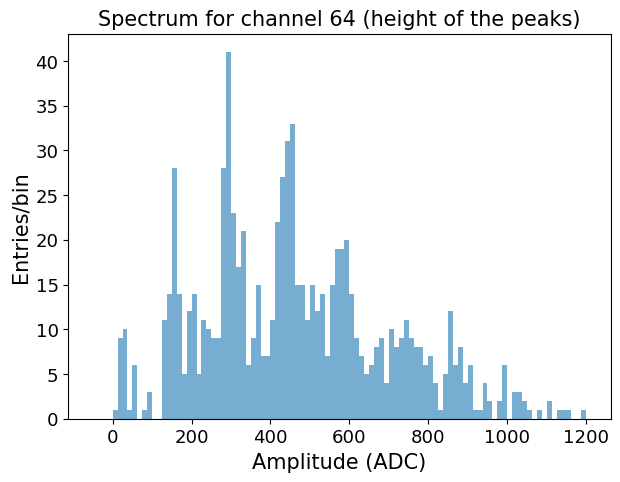

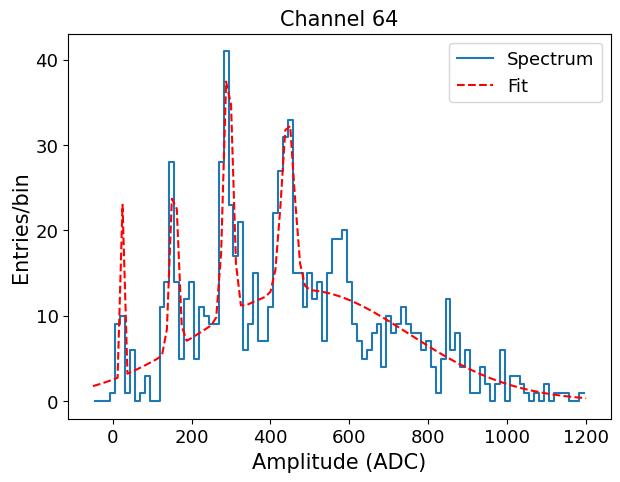

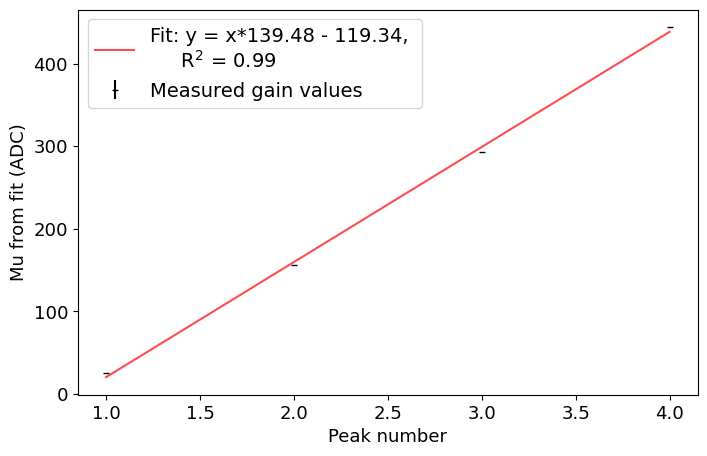


------------------------------------------------------------------------------------------
-------    Channel 65, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



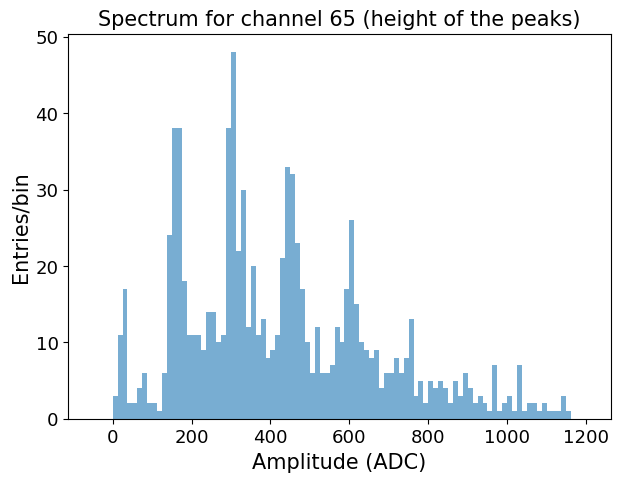

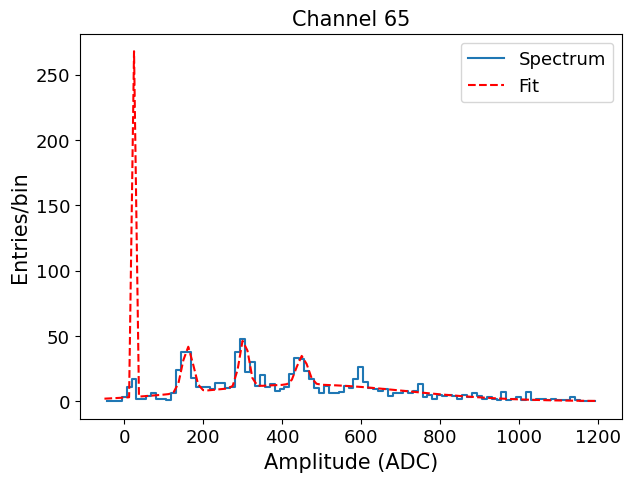

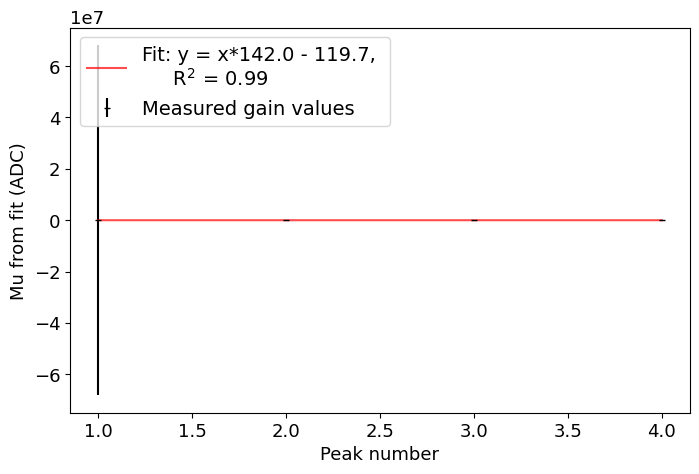


------------------------------------------------------------------------------------------
-------    Channel 66, Vbias = 55 V, VLED = 6.6   ------------------------
------------------------------------------------------------------------------------------



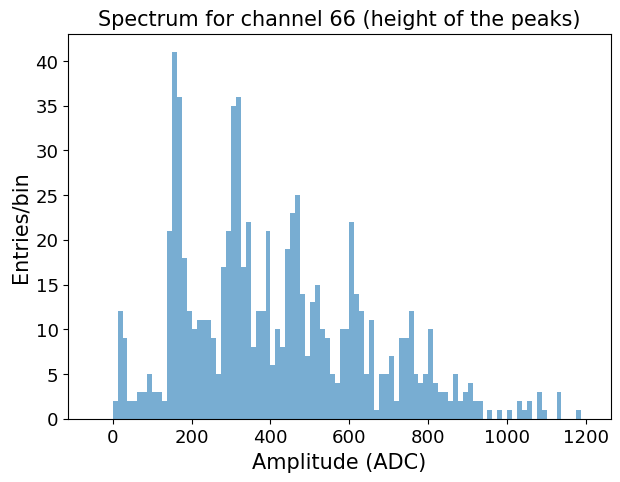

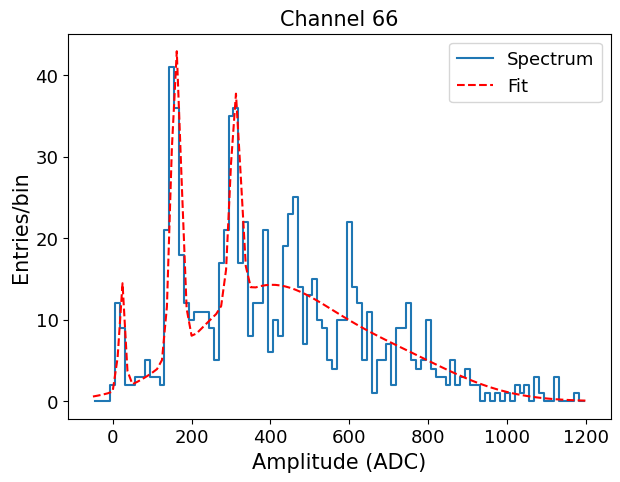

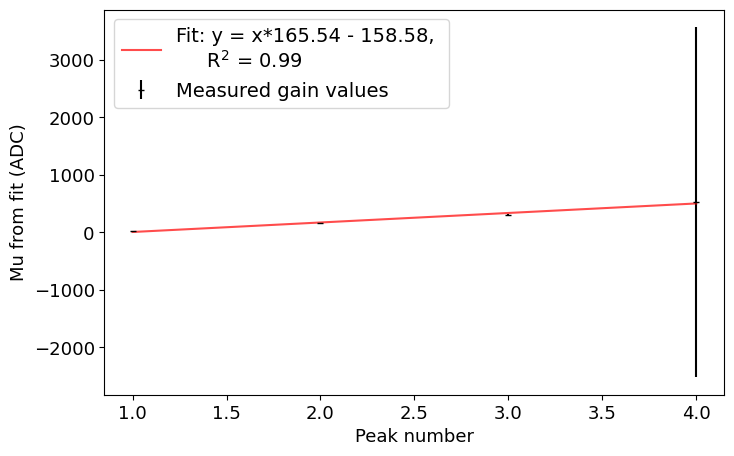

In [27]:
vb = 55
for ch, vled in zip(channels, vleds0):
    vl = vled + 0.6
    initial_guess = [200, 20, 10, 250, 155, 15, 120, 290, 15, 60, 430, 15, 15, 580, 10]
    gain, ch_means = extract_gain_and_mean(channel       = ch,
                                           vbias         = vb,
                                           vled          = vl,
                                           bins          = 100,
                                           prange        = (-50, 1200),
                                           initial_guess = initial_guess)
    all_gains[channel_v(channel=ch, vbias=vb, vled=vl)] = gain
    all_means[channel_v(channel=ch, vbias=vb, vled=vl)] = ch_means

In [29]:
gains_vb55 = np.array([all_gains[channel_v(channel=ch, vbias=55, vled=0.6+vl)] for ch,vl in zip(channels, vleds0)])
gains_vb56 = np.array([all_gains[channel_v(channel=ch, vbias=56, vled=0.6+vl)] for ch,vl in zip(channels, vleds0)])

In [38]:
gains_vb55_dict = {ch: val for ch, val in zip(channels, gains_vb55)}
gains_vb56_dict = {ch: val for ch, val in zip(channels, gains_vb56)}

gains_vb55_dict, gains_vb56_dict

({1: 134.57801821068307,
  2: 133.68639541659417,
  3: 136.39412142752434,
  55: 138.11533158918587,
  56: 140.29249585990934,
  57: 136.4647792327249,
  58: 131.27390485861008,
  59: 127.5631927486102,
  60: 130.72306411339642,
  64: 139.4783214013925,
  65: 142.00175879970283,
  66: 165.54074459557143},
 {1: 174.0310783309319,
  2: 172.9659915183511,
  3: 176.42412688156938,
  55: 179.54566930515443,
  56: 179.2100656101615,
  57: 179.218145635049,
  58: 177.77043258074494,
  59: 166.97475842493634,
  60: 173.60047227393528,
  64: 184.8525647026398,
  65: 181.81694523570545,
  66: 186.0452881674908})

In [36]:
import json

### store_json = True
### for vb,g in zip([55, 56], [gains_vb55_dict, gains_vb56_dict]):
###     json_filename = f'/Users/romoluque_c/LEGEND/BACON/datatest/gains_dark_box_vb{vb}.json'
###     if store_json:
###         with open(json_filename, 'w') as json_file:
###             json.dump(g, json_file, indent=2)

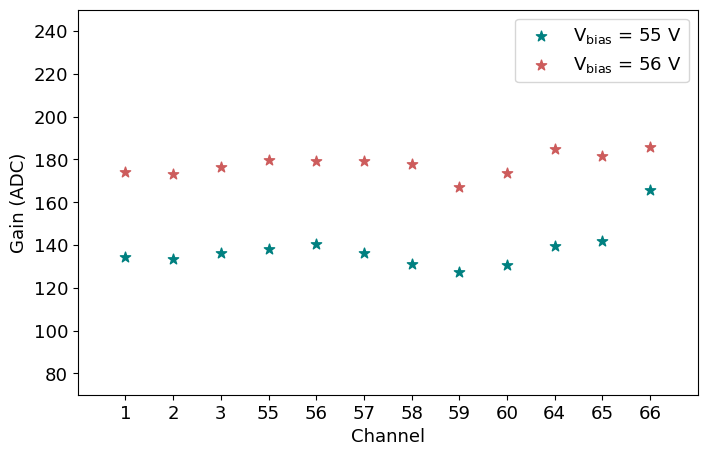

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(gains_vb55)), gains_vb55, marker='*', s=60, label='V$_{\mathrm{bias}}$ = 55 V', color='teal')
plt.scatter(range(len(gains_vb56)), gains_vb56, marker='*', s=60, label='V$_{\mathrm{bias}}$ = 56 V', color='indianred')
plt.xlim(-1, 12)
plt.ylim(70, 250)
plt.ylabel('Gain (ADC)')
plt.xlabel('Channel')
plt.xticks(range(len(gains_vb55)), channels)
plt.legend()
#plt.savefig('/Users/romoluque_c/LEGEND/BACON/plots/Gain_all_channels_black_box.pdf', bbox_inches='tight')
plt.show()

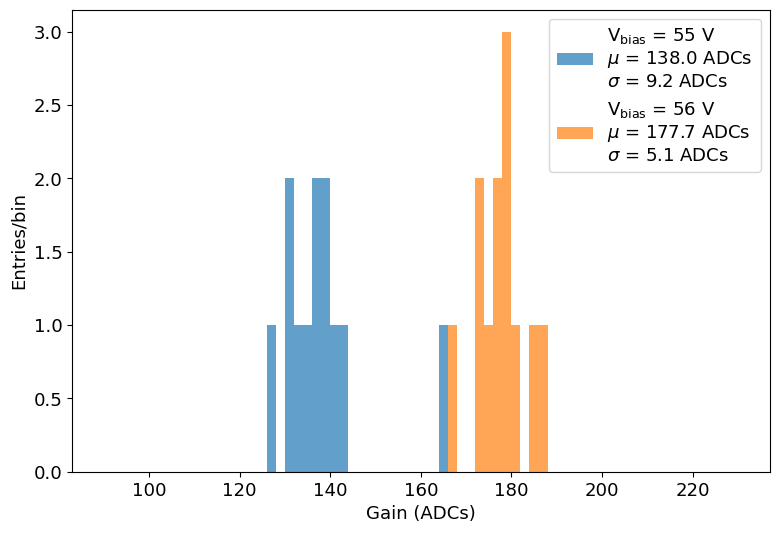

In [27]:
lab1 = 'V$_{\mathrm{bias}}$ = 55 V \n$\mu$ = '+f'{np.round(np.mean(gains_vb55), 1)} ADC \n$\sigma$ = {np.round(np.std(gains_vb55), 1)} ADC'
lab2 = 'V$_{\mathrm{bias}}$ = 56 V \n$\mu$ = '+f'{np.round(np.mean(gains_vb56), 1)} ADC \n$\sigma$ = {np.round(np.std(gains_vb56), 1)} ADC'

plt.hist(gains_vb55, bins=70, range=(90, 230), label=lab1, alpha=0.7)
plt.hist(gains_vb56, bins=70, range=(90, 230), label=lab2, alpha=0.7)
plt.xlabel('Gain (ADC)')
plt.ylabel('Entries/bin')
plt.legend()
plt.show()

### Compute the quantum efficiency for the different channels

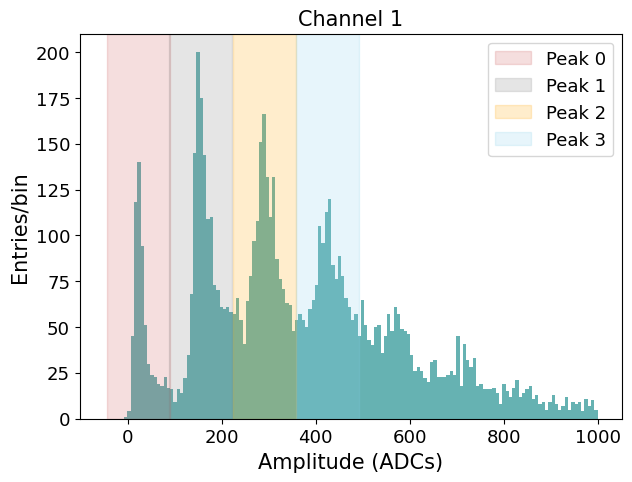

In [28]:
colors = ['indianred', 'grey', 'orange', 'skyblue']

plt.figure(figsize=(7, 5))
y, x, _ = plt.hist(all_max_data[channel_v(channel=1, vbias=55, vled=7.6)], bins=150, range=(-50, 1000), alpha=0.6, color='teal')
means_ch1 = all_means[channel_v(channel=1, vbias=55, vled=7.6)]
gain_ch1  = all_gains[channel_v(channel=1, vbias=55, vled=7.6)]

for i, (mean, col) in enumerate(zip(means_ch1[:3], colors[:3])):
    plt.axvspan(mean-gain_ch1/2, mean+gain_ch1/2, alpha=0.2, color=col, label=f'Peak {i}')
plt.axvspan(means_ch1[2]+gain_ch1/2, means_ch1[2]+3*gain_ch1/2, alpha=0.2, color='skyblue', label=f'Peak 3')
plt.xlabel('Amplitude (ADC)', fontsize=15)
plt.ylabel('Entries/bin',      fontsize=15)
plt.title(f"Channel 1", fontsize=15)
plt.legend()
plt.show()

In [29]:
integ_all_chs = {}

for vb in [55, 56]:
    for ch,vl in zip(channels, vleds0):
        means_ch1 = all_means[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        gain_ch1  = all_gains[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        ints_ch   = []
        for mean_ch in means_ch1[:3]:
            ch_spec    = all_max_data[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
            peak_wf_rt = np.sum(ch_spec[(ch_spec>(mean_ch-gain_ch1/2)) & (ch_spec<(mean_ch+gain_ch1/2))])
            ints_ch.append(peak_wf_rt)
            
        ints_ch.append(np.sum(ch_spec[(ch_spec>(means_ch1[2]+gain_ch1/2)) & (ch_spec<(means_ch1[2]+3*gain_ch1/2))]))
        
        integ_all_chs[channel_v(channel=ch, vbias=vb, vled=0.6+vl)] = np.array(ints_ch)

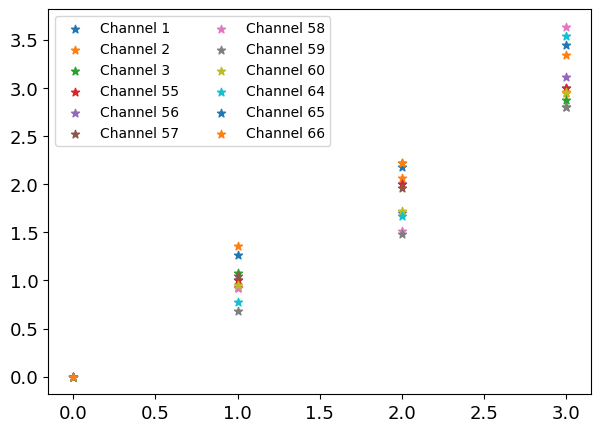

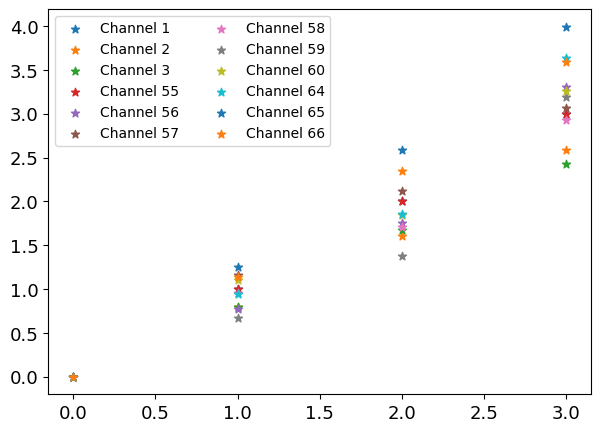

In [30]:
for vb in [55, 56]:
    plt.figure(figsize=(7, 5))
    for ch,vl in zip(channels, vleds0):
        ints_ch = integ_all_chs[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        #print(np.arange(4)*ints_ch/ints_ch1)
        if ch < 4:
            ref_ch = integ_all_chs[channel_v(channel=1,  vbias=vb, vled=7.6)]
        else:
            ref_ch = integ_all_chs[channel_v(channel=55, vbias=vb, vled=6.6)]
        plt.scatter(np.arange(4), np.arange(4)*ints_ch/ref_ch, marker='*', label=f'Channel {ch}')
    plt.legend(fontsize=10, ncol=2)
    plt.show()

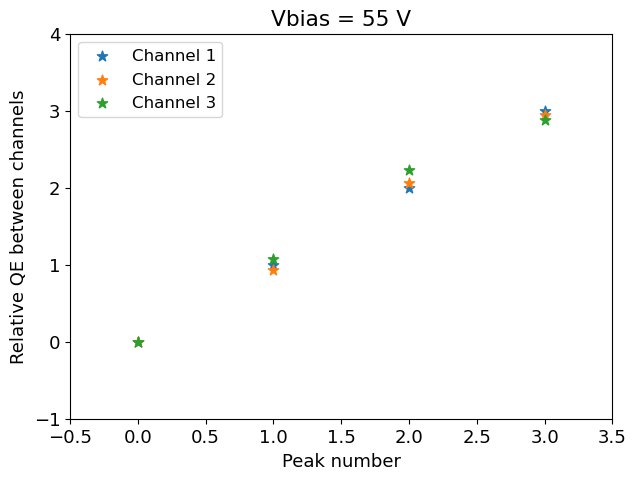

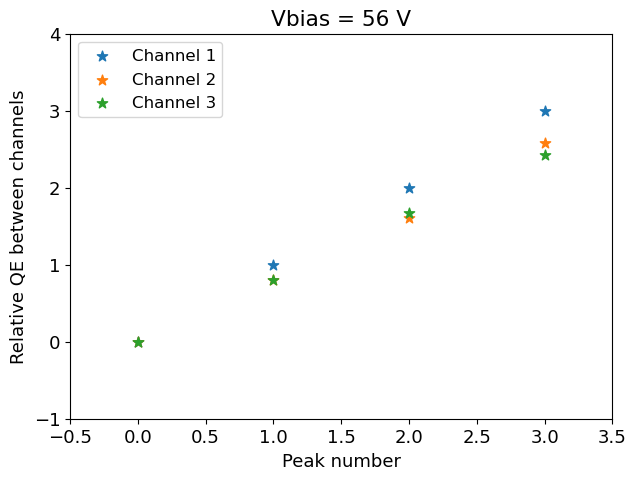

In [31]:
for vb in [55, 56]:
    plt.figure(figsize=(7, 5))
    for ch,vl in zip(channels, vleds0):
        ints_ch = integ_all_chs[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        #print(np.arange(4)*ints_ch/ints_ch1)
        if ch < 4:
            ref_ch = integ_all_chs[channel_v(channel=1,  vbias=vb, vled=7.6)]
            plt.scatter(np.arange(4), np.arange(4)*ints_ch/ref_ch, marker='*', s=60, label=f'Channel {ch}')
    plt.legend(fontsize=12)
    plt.title(f'Vbias = {vb} V')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-1, 4)
    plt.xlabel('Peak number')
    plt.ylabel('Relative QE between channels')
    plt.show()

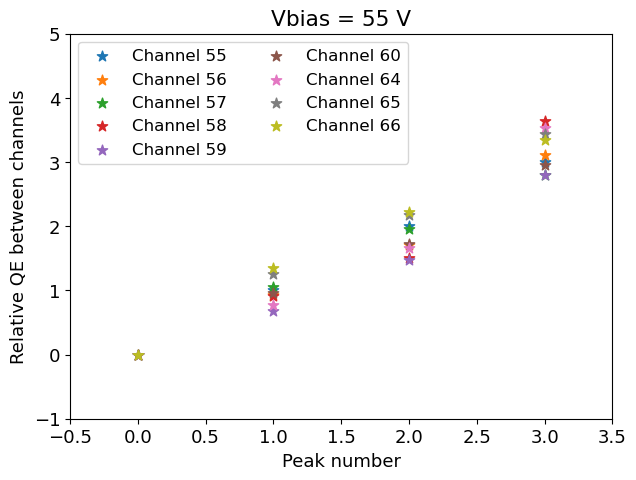

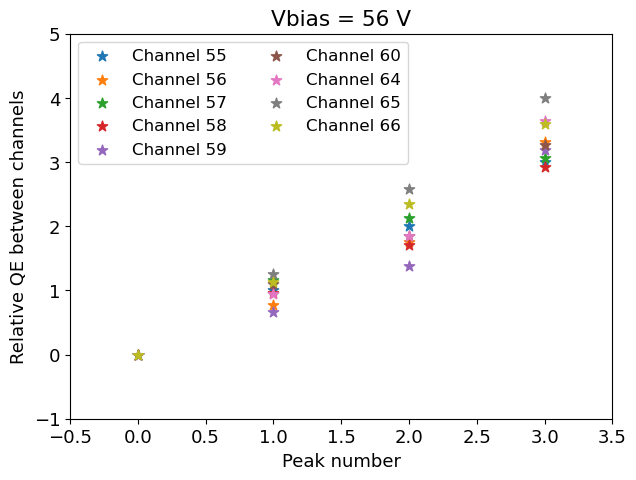

In [32]:
for vb in [55, 56]:
    plt.figure(figsize=(7, 5))
    for ch,vl in zip(channels, vleds0):
        ints_ch = integ_all_chs[channel_v(channel=ch, vbias=vb, vled=0.6+vl)]
        #print(np.arange(4)*ints_ch/ints_ch1)
        if ch > 4:
            ref_ch = integ_all_chs[channel_v(channel=55,  vbias=vb, vled=6.6)]
            plt.scatter(np.arange(4), np.arange(4)*ints_ch/ref_ch, marker='*', s=60, label=f'Channel {ch}')
    plt.title(f'Vbias = {vb} V')
    plt.legend(fontsize=12, ncol=2)
    plt.xlim(-0.5, 3.5)
    plt.ylim(-1, 5)
    plt.xlabel('Peak number')
    plt.ylabel('Relative QE between channels')
    plt.show()